# Project Objective

Five miillion Americans are currently living with heart diseases, and the nubers are expected to rise.
it is very important to understand the factors which causes Heart-attacks so that certain precautions can be taken by individuals.
In order to understand the reasons of the Heart attack, a data was collected from various hospitals across US which is given
in US_Heart_Patients.csv. in the data set there are heart attack indicates wheather the person suffered from Heart attack or not.

In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Us_Heart_Patient.csv')

In [3]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [4]:
df.shape

(4238, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
for column in df.columns:
    print(column.upper(),':', df[column].nunique)
    print()
    print(df[column].value_counts())
    print()

MALE : <bound method IndexOpsMixin.nunique of 0       1
1       0
2       1
3       0
4       0
       ..
4233    1
4234    1
4235    0
4236    0
4237    0
Name: male, Length: 4238, dtype: int64>

male
0    2419
1    1819
Name: count, dtype: int64

AGE : <bound method IndexOpsMixin.nunique of 0       39
1       46
2       48
3       61
4       46
        ..
4233    50
4234    51
4235    48
4236    44
4237    52
Name: age, Length: 4238, dtype: int64>

age
40    191
46    182
42    180
41    174
48    173
39    169
44    166
45    162
43    159
52    149
51    146
55    145
38    144
47    141
50    140
53    139
54    132
49    132
57    123
56    123
59    119
58    117
60    111
63    110
61    110
62     99
64     93
37     92
36     84
65     57
67     45
35     42
66     38
34     18
68     18
69      7
33      5
70      2
32      1
Name: count, dtype: int64

EDUCATION : <bound method IndexOpsMixin.nunique of 0       4.0
1       2.0
2       1.0
3       3.0
4       3.0
       ... 
4

In [7]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
cat = ['education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']

In [9]:
for i in cat:
    df[i] = df[i].astype('object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   object 
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   object 
 8   diabetes         4238 non-null   object 
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 529.9+ KB


In [11]:
cat = []
num = []
for i in df.columns:
    if df[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
['male', 'age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


In [12]:
round(df[num].describe(),2).T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.43,0.50,0.00,0.00,0.0,1.00,1.0
age,4238.0,49.58,8.57,32.00,42.00,49.0,56.00,70.0
cigsPerDay,4209.0,9.00,11.92,0.00,0.00,0.0,20.00,70.0
totChol,4188.0,236.72,44.59,107.00,206.00,234.0,263.00,696.0
sysBP,4238.0,132.35,22.04,83.50,117.00,128.0,144.00,295.0
diaBP,4238.0,82.89,11.91,48.00,75.00,82.0,89.88,142.5
BMI,4219.0,25.80,4.08,15.54,23.07,25.4,28.04,56.8
heartRate,4237.0,75.88,12.03,44.00,68.00,75.0,83.00,143.0
glucose,3850.0,81.97,23.96,40.00,71.00,78.0,87.00,394.0
TenYearCHD,4238.0,0.15,0.36,0.00,0.00,0.0,0.00,1.0


In [13]:
round(df[cat].describe(),2).T

,count,unique,top,freq
education,4133.0,4.0,1.0,1720.0
currentSmoker,4238.0,2.0,0.0,2144.0
BPMeds,4185.0,2.0,0.0,4061.0
prevalentStroke,4238.0,2.0,0.0,4213.0
prevalentHyp,4238.0,2.0,0.0,2922.0
diabetes,4238.0,2.0,0.0,4129.0


# Null Value Analysis and Treatment

In [14]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [15]:
round(df.isnull().sum() *100/df.shape[0],2).sort_values()      # percentage of null value

male               0.00
age                0.00
currentSmoker      0.00
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
sysBP              0.00
diaBP              0.00
TenYearCHD         0.00
heartRate          0.02
BMI                0.45
cigsPerDay         0.68
totChol            1.18
BPMeds             1.25
education          2.48
glucose            9.16
dtype: float64

#### Treating NULL Values - Categorical

In [16]:
for column in cat:
    df[column].fillna(df[column].mode()[0],inplace=True)

In [17]:
df[cat].isnull().sum()

education          0
currentSmoker      0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
dtype: int64

#### Treating NULL Values - Numerical

In [18]:
df_mean = df.copy()

In [19]:
df_median = df.copy()

In [20]:
df_knn = df.copy()

In [21]:
df_2 = df.copy()

In [22]:
for i in num:
    df_mean[i].fillna(df_mean[i].mean(),inplace=True)

In [23]:
for i in num:
    df_median[i].fillna(df_median[i].median(),inplace=True)

In [24]:
df_mean[num].isnull().sum()

male          0
age           0
cigsPerDay    0
totChol       0
sysBP         0
diaBP         0
BMI           0
heartRate     0
glucose       0
TenYearCHD    0
dtype: int64

In [25]:
df_median[num].isnull().sum()

male          0
age           0
cigsPerDay    0
totChol       0
sysBP         0
diaBP         0
BMI           0
heartRate     0
glucose       0
TenYearCHD    0
dtype: int64

In [26]:
cat = ['male','education','currentSmoker','BPMeds','totChol','diaBP','sysBP']

In [27]:
df_2 = pd.get_dummies(df_2, columns= cat,drop_first=True, dtype= float)

In [28]:
from sklearn.impute import KNNImputer

imputer= KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_knn)
df_knn = pd.DataFrame(data= df_imputed, columns=df_knn.columns)

In [29]:
df_knn.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Handling Duplicates

In [30]:
df.duplicated().sum()

0

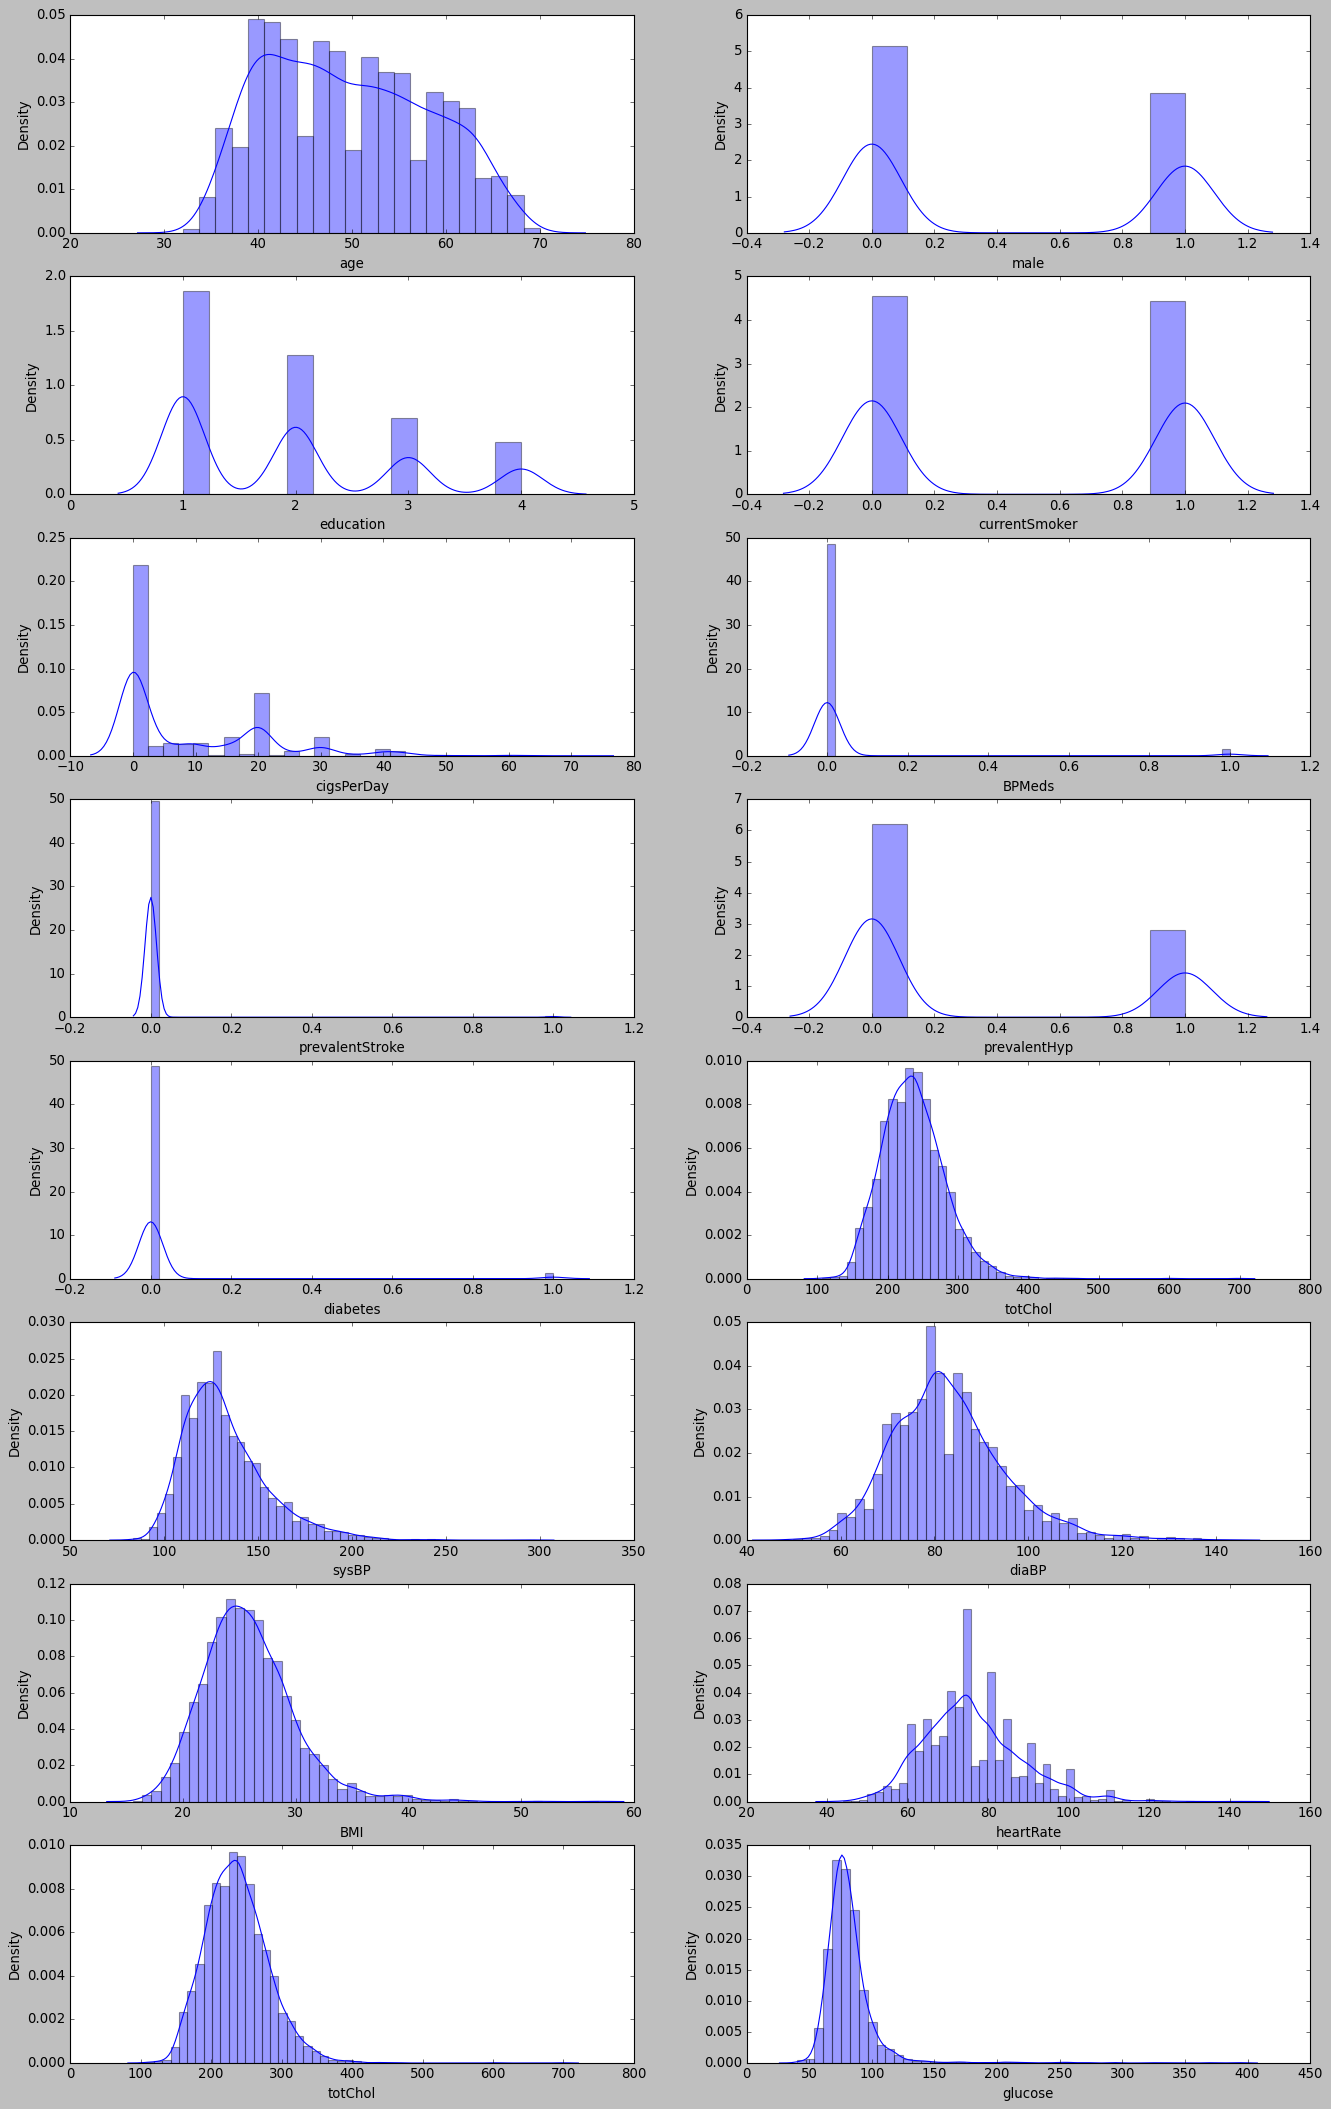

In [31]:
fig, axes = plt.subplots(nrows=8, ncols=2, figsize = (20,32))

a = sns.distplot(df_mean['age'], ax=axes[0][0])

a = sns.distplot(df['male'], vertical=False, ax=axes[0][1])

a = sns.distplot(df['education'], vertical=False, ax=axes[1][0])

a = sns.distplot(df['currentSmoker'], vertical=False, ax=axes[1][1])

a = sns.distplot(df['cigsPerDay'], vertical=False, ax=axes[2][0])

a = sns.distplot(df['BPMeds'], vertical=False, ax=axes[2][1])

a = sns.distplot(df['prevalentStroke'], vertical=False, ax=axes[3][0])

a = sns.distplot(df['prevalentHyp'], vertical=False, ax=axes[3][1])

a = sns.distplot(df['diabetes'], vertical=False, ax=axes[4][0])

a = sns.distplot(df['totChol'], vertical=False, ax=axes[4][1])

a = sns.distplot(df['sysBP'], vertical=False, ax=axes[5][0])

a = sns.distplot(df['diaBP'], vertical=False, ax=axes[5][1])

a = sns.distplot(df['BMI'], vertical=False, ax=axes[6][0])

a = sns.distplot(df['heartRate'], vertical=False, ax=axes[6][1])

a = sns.distplot(df['totChol'], vertical=False, ax=axes[7][0])

a = sns.distplot(df['glucose'], vertical=False, ax=axes[7][1])


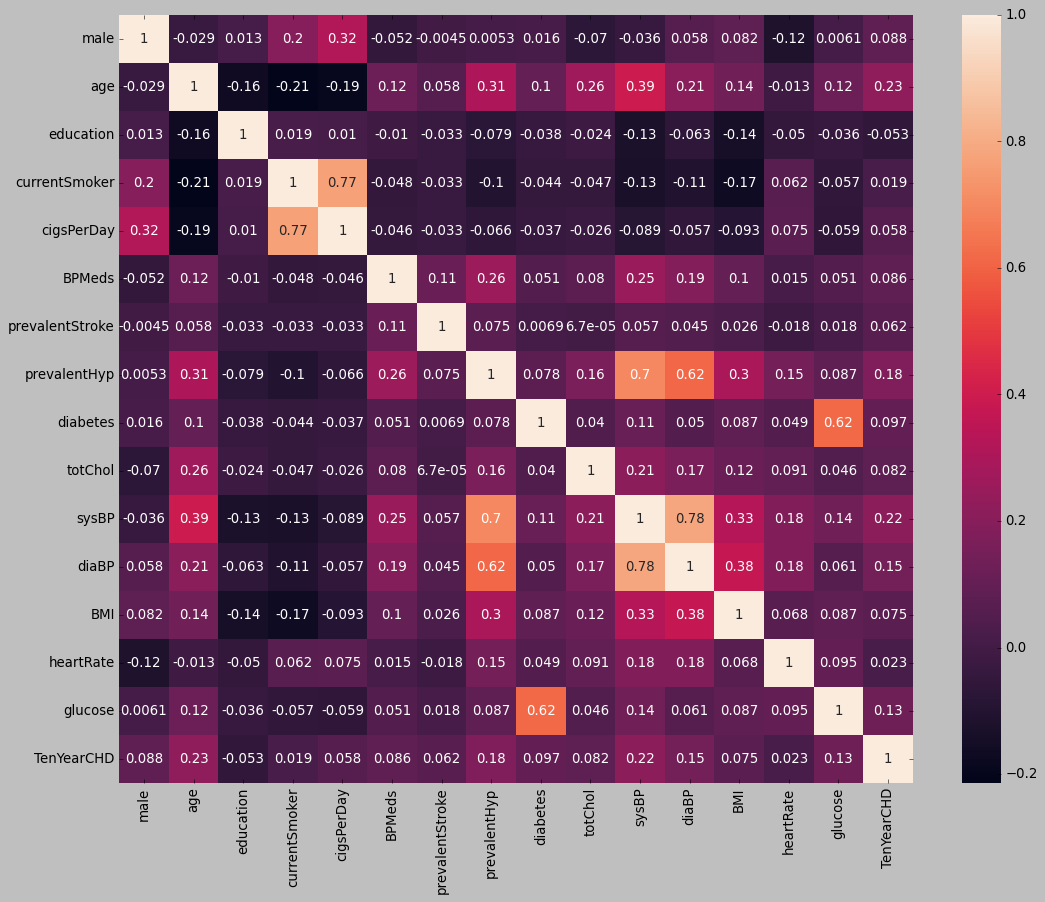

In [32]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Univariate and Bivariate Analysis

#### Mean Dataset

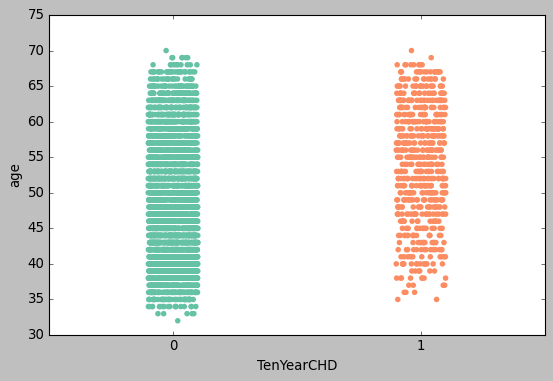

In [33]:
plt.figure(figsize=(8,5))
sns.stripplot(x='TenYearCHD', y='age',data=df_mean, jitter=True, color='red', palette='Set2')
plt.show()

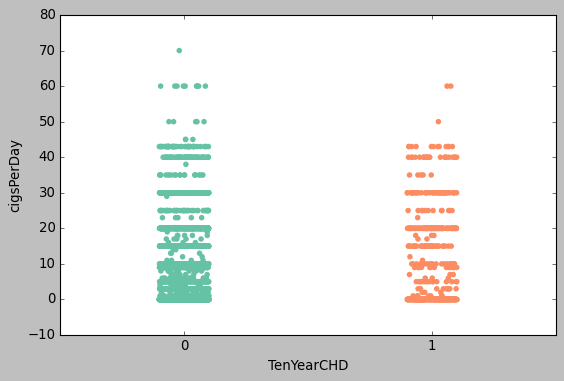

In [34]:
plt.figure(figsize=(8,5))
sns.stripplot(x='TenYearCHD', y='cigsPerDay',data=df_mean, jitter=True, color='red', palette='Set2')
plt.show()

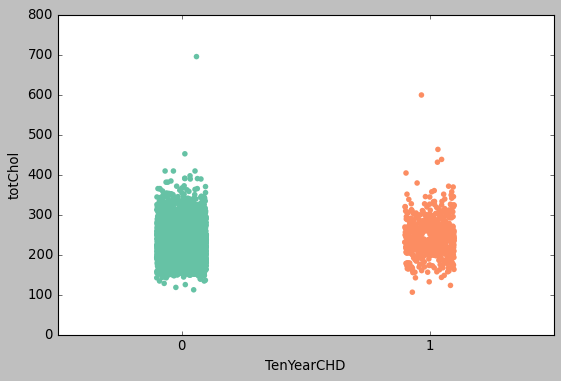

In [35]:
plt.figure(figsize=(8,5))
sns.stripplot(x='TenYearCHD', y='totChol',data=df_mean, jitter=True, color='red', palette='Set2')
plt.show()

# Correlation Plot

<function matplotlib.pyplot.show(close=None, block=None)>

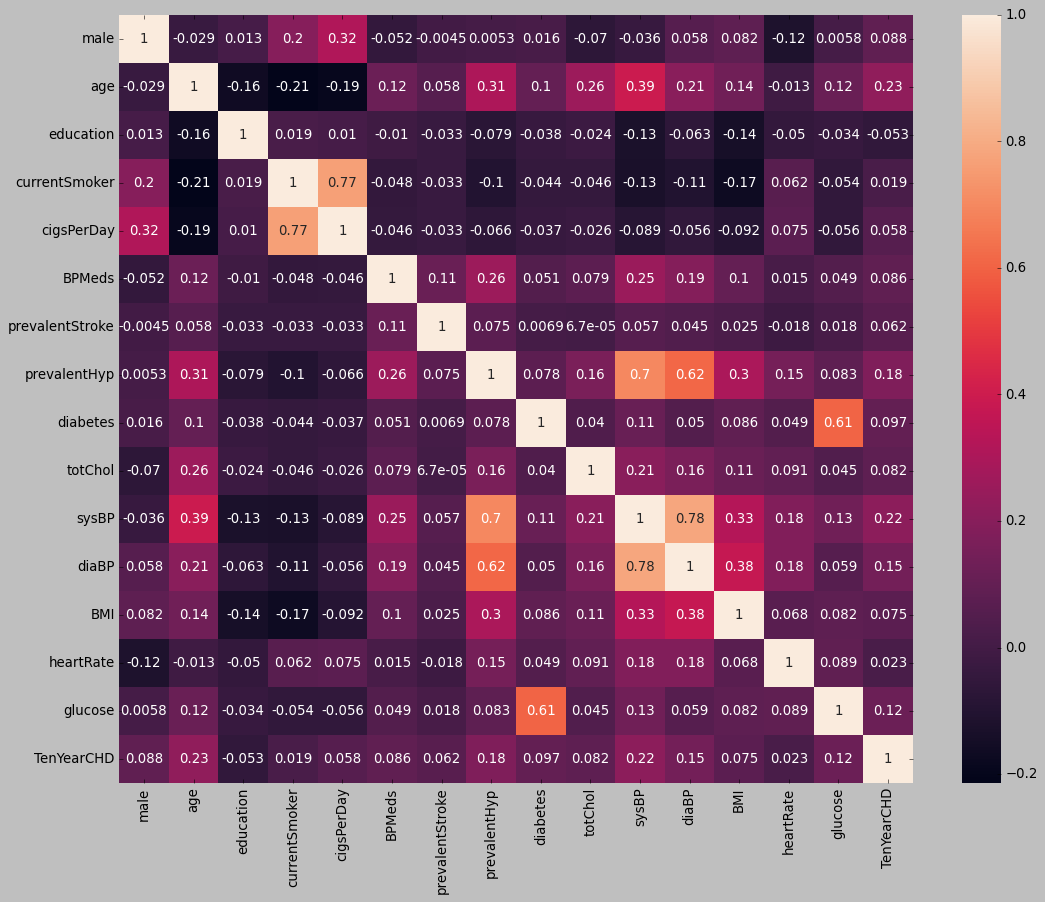

In [36]:
plt.figure(figsize=(16,12))
sns.heatmap(df_mean.corr(), annot= True)
plt.show

In [37]:
df_mean.drop(['currentSmoker','diaBP'], axis=1, inplace=True)

In [38]:
df_median.drop(['currentSmoker','diaBP'], axis=1, inplace=True)

In [39]:
df_mean

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,0,0,195.0,106.0,26.97,80.0,77.000000,0
1,0,46,2.0,0.0,0.0,0,0,0,250.0,121.0,28.73,95.0,76.000000,0
2,1,48,1.0,20.0,0.0,0,0,0,245.0,127.5,25.34,75.0,70.000000,0
3,0,61,3.0,30.0,0.0,0,1,0,225.0,150.0,28.58,65.0,103.000000,1
4,0,46,3.0,23.0,0.0,0,0,0,285.0,130.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1.0,0.0,0,1,0,313.0,179.0,25.97,66.0,86.000000,1
4234,1,51,3.0,43.0,0.0,0,0,0,207.0,126.5,19.71,65.0,68.000000,0
4235,0,48,2.0,20.0,0.0,0,0,0,248.0,131.0,22.00,84.0,86.000000,0
4236,0,44,1.0,15.0,0.0,0,0,0,210.0,126.5,19.16,86.0,81.966753,0


<function matplotlib.pyplot.show(close=None, block=None)>

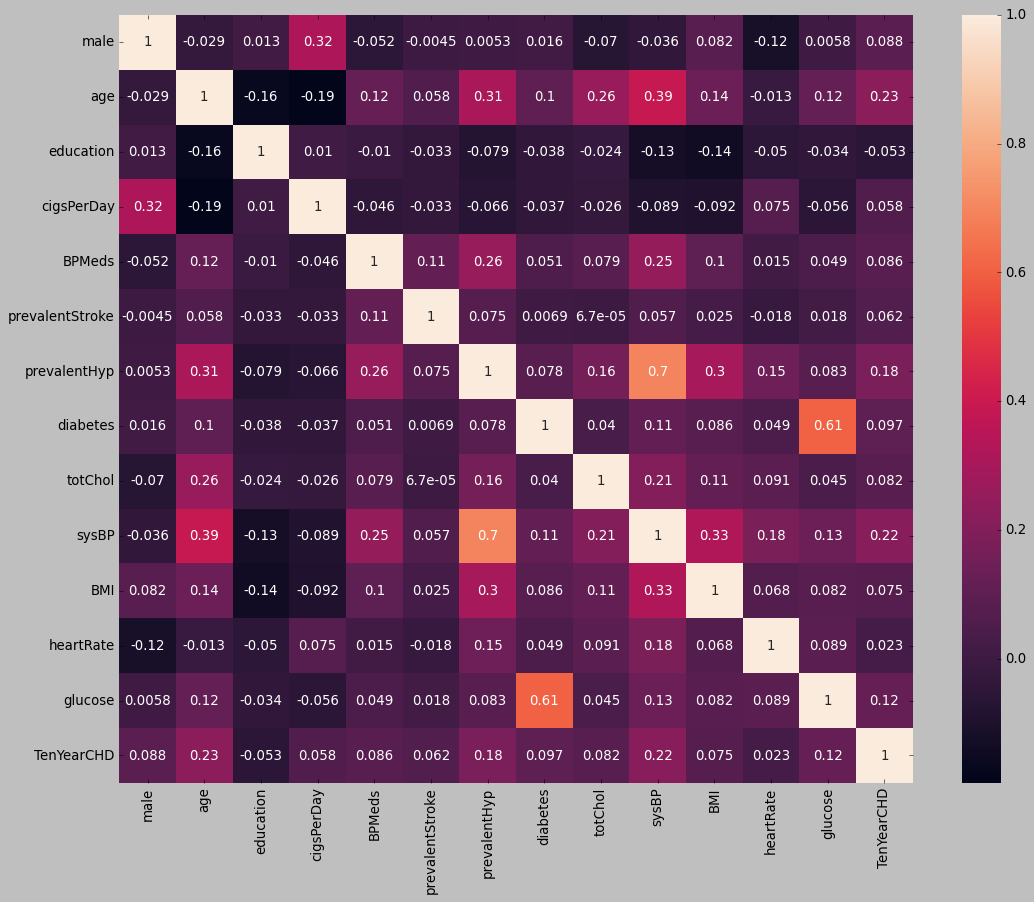

In [40]:
plt.figure(figsize=(16,12))
sns.heatmap(df_mean.corr(), annot= True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

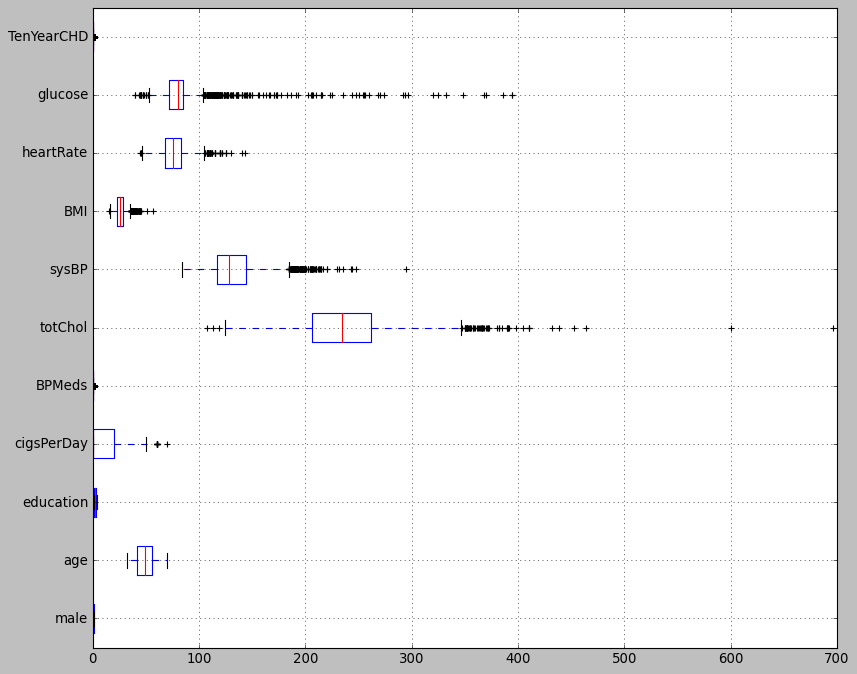

In [41]:
plt.figure(figsize=(12,10))
df_mean.boxplot(vert = 0)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

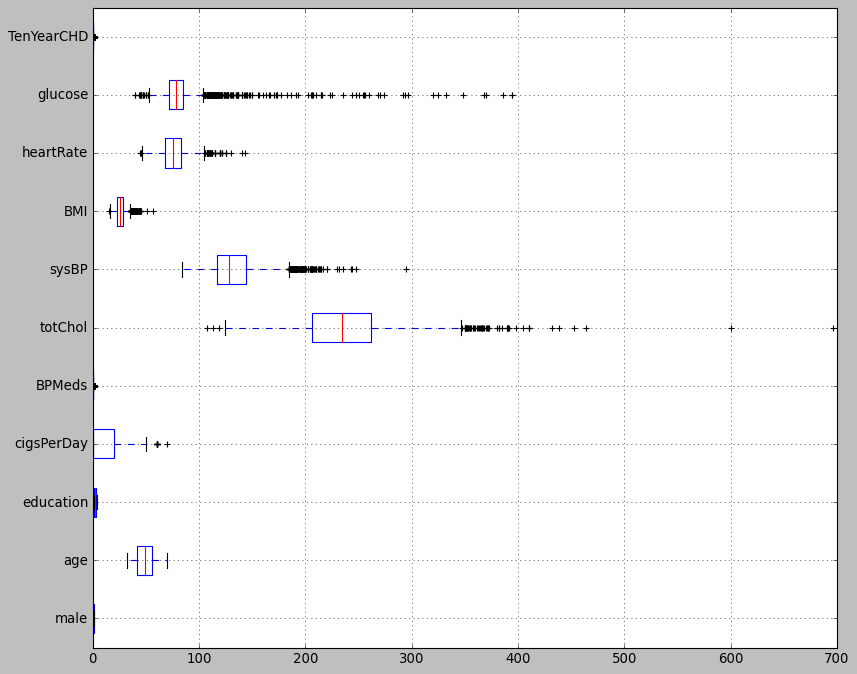

In [42]:
plt.figure(figsize=(12,10))
df_median.boxplot(vert = 0)
plt.show

# Outlier Treatment

In [43]:
df_mean_out = df_mean.copy()

In [44]:
df_median_out = df_median.copy()

In [45]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = np.percentile(col,[25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [46]:
for column in df_mean_out.drop('glucose', axis=1).columns:
    lr, ur = remove_outlier(df_mean_out[column])
    
    df_mean_out[column]= np.where(df_mean_out[column]>ur, ur, df_mean_out[column])
    
    df_mean_out[column] = np.where(df_mean_out[column]<lr, lr, df_mean_out[column])

In [47]:
for column in df_median_out.drop('glucose', axis=1).columns:
    lr, ur = remove_outlier(df_median_out[column])
    
    df_median_out[column]= np.where(df_median_out[column]>ur, ur, df_median_out[column])
    
    df_median_out[column] = np.where(df_median_out[column]<lr, lr, df_median_out[column])

<function matplotlib.pyplot.show(close=None, block=None)>

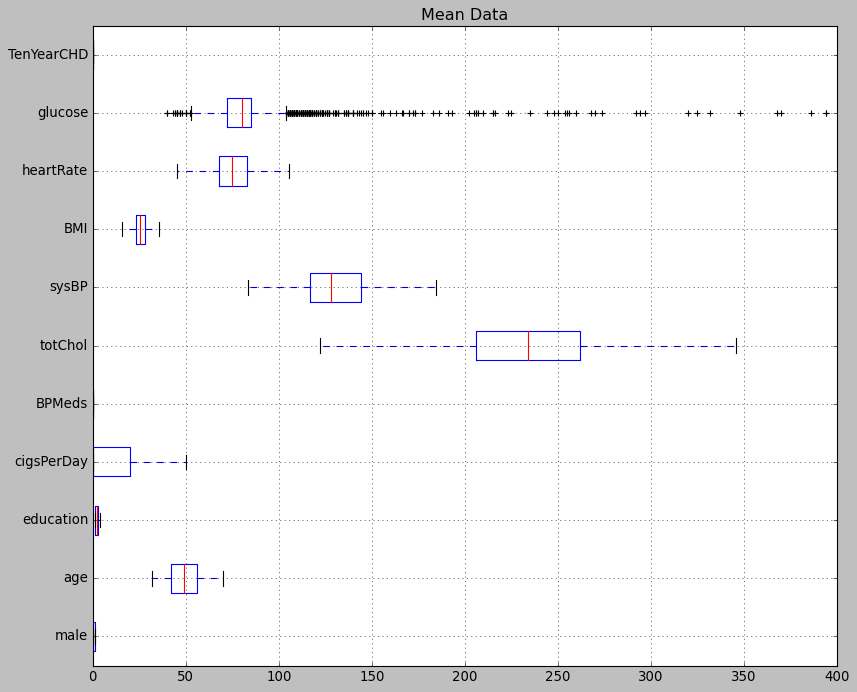

In [48]:
plt.figure(figsize=(12,10))
plt.title("Mean Data")
df_mean_out.boxplot(vert = 0)
plt.show

In [49]:
print([x for x in range(2, 101) if all(x % y for y in range(2, x))])

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


<function matplotlib.pyplot.show(close=None, block=None)>

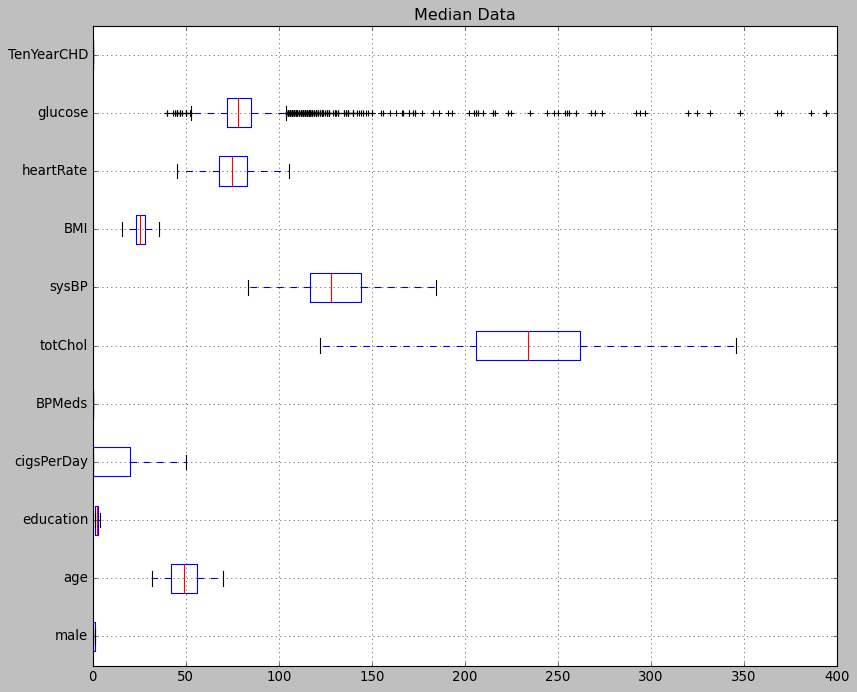

In [50]:
plt.figure(figsize=(12,10))
plt.title("Median Data")
df_median_out.boxplot(vert = 0)
plt.show

In [51]:
df_mean_out

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0,0,0,195.0,106.0,26.97,80.0,77.000000,0.0
1,0.0,46.0,2.0,0.0,0.0,0,0,0,250.0,121.0,28.73,95.0,76.000000,0.0
2,1.0,48.0,1.0,20.0,0.0,0,0,0,245.0,127.5,25.34,75.0,70.000000,0.0
3,0.0,61.0,3.0,30.0,0.0,0,1,0,225.0,150.0,28.58,65.0,103.000000,0.0
4,0.0,46.0,3.0,23.0,0.0,0,0,0,285.0,130.0,23.10,85.0,85.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,0.0,0,1,0,313.0,179.0,25.97,66.0,86.000000,0.0
4234,1.0,51.0,3.0,43.0,0.0,0,0,0,207.0,126.5,19.71,65.0,68.000000,0.0
4235,0.0,48.0,2.0,20.0,0.0,0,0,0,248.0,131.0,22.00,84.0,86.000000,0.0
4236,0.0,44.0,1.0,15.0,0.0,0,0,0,210.0,126.5,19.16,86.0,81.966753,0.0


In [52]:
df_median_out

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0,0,0,195.0,106.0,26.97,80.0,77.0,0.0
1,0.0,46.0,2.0,0.0,0.0,0,0,0,250.0,121.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,20.0,0.0,0,0,0,245.0,127.5,25.34,75.0,70.0,0.0
3,0.0,61.0,3.0,30.0,0.0,0,1,0,225.0,150.0,28.58,65.0,103.0,0.0
4,0.0,46.0,3.0,23.0,0.0,0,0,0,285.0,130.0,23.10,85.0,85.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,0.0,0,1,0,313.0,179.0,25.97,66.0,86.0,0.0
4234,1.0,51.0,3.0,43.0,0.0,0,0,0,207.0,126.5,19.71,65.0,68.0,0.0
4235,0.0,48.0,2.0,20.0,0.0,0,0,0,248.0,131.0,22.00,84.0,86.0,0.0
4236,0.0,44.0,1.0,15.0,0.0,0,0,0,210.0,126.5,19.16,86.0,78.0,0.0


In [53]:
for column in df_mean_out.columns:
    if df_mean_out[column].dtype == 'object':
        df_mean_out[column] = df_mean_out[column].astype('float')


In [54]:
df_mean_out.dtypes

male               float64
age                float64
education          float64
cigsPerDay         float64
BPMeds             float64
prevalentStroke    float64
prevalentHyp       float64
diabetes           float64
totChol            float64
sysBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD         float64
dtype: object

In [55]:
df_median_out.dtypes

male               float64
age                float64
education          float64
cigsPerDay         float64
BPMeds             float64
prevalentStroke     object
prevalentHyp        object
diabetes            object
totChol            float64
sysBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD         float64
dtype: object

# Min-Max Scaler

In [56]:
#df_mean_out = df_mean_out.apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [57]:
#df_mean = df_mean.apply(lambda x:(x-x.min()) / (x.max() - x.min()))

In [58]:
df_mean

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,0,0,195.0,106.0,26.97,80.0,77.000000,0
1,0,46,2.0,0.0,0.0,0,0,0,250.0,121.0,28.73,95.0,76.000000,0
2,1,48,1.0,20.0,0.0,0,0,0,245.0,127.5,25.34,75.0,70.000000,0
3,0,61,3.0,30.0,0.0,0,1,0,225.0,150.0,28.58,65.0,103.000000,1
4,0,46,3.0,23.0,0.0,0,0,0,285.0,130.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1.0,0.0,0,1,0,313.0,179.0,25.97,66.0,86.000000,1
4234,1,51,3.0,43.0,0.0,0,0,0,207.0,126.5,19.71,65.0,68.000000,0
4235,0,48,2.0,20.0,0.0,0,0,0,248.0,131.0,22.00,84.0,86.000000,0
4236,0,44,1.0,15.0,0.0,0,0,0,210.0,126.5,19.16,86.0,81.966753,0


# Standard Scaler

In [59]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

df_mean_out = pd.DataFrame(scale.fit_transform(df_mean_out), columns= df_mean_out.columns)

In [60]:
df_mean_out

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1.153192,-1.234951,2.008372,-0.763194,0.0,0.0,-0.671101,0.0,-0.974747,-1.255196,0.330699,0.365617,-0.217517,0.0
1,-0.867158,-0.418257,0.044486,-0.763194,0.0,0.0,-0.671101,0.0,0.325744,-0.528621,0.795304,1.656274,-0.261311,0.0
2,1.153192,-0.184916,-0.937456,0.938008,0.0,0.0,-0.671101,0.0,0.207518,-0.213772,-0.099589,-0.064601,-0.524078,0.0
3,-0.867158,1.331800,1.026429,1.788609,0.0,0.0,1.490089,0.0,-0.265388,0.876090,0.755707,-0.925039,0.921141,0.0
4,-0.867158,-0.418257,1.026429,1.193188,0.0,0.0,-0.671101,0.0,1.153330,-0.092676,-0.690905,0.795836,0.132840,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.153192,0.048425,-0.937456,-0.678134,0.0,0.0,1.490089,0.0,1.815398,2.280801,0.066719,-0.838995,0.176634,0.0
4234,1.153192,0.165095,1.026429,2.894390,0.0,0.0,-0.671101,0.0,-0.691003,-0.262210,-1.585798,-0.925039,-0.611667,0.0
4235,-0.867158,-0.184916,0.044486,0.938008,0.0,0.0,-0.671101,0.0,0.278454,-0.044238,-0.981283,0.709792,0.176634,0.0
4236,-0.867158,-0.651598,-0.937456,0.512707,0.0,0.0,-0.671101,0.0,-0.620067,-0.262210,-1.730987,0.881880,0.000000,0.0


# Model Building on Mean Data

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X = df_mean_out.drop('TenYearCHD', axis=1)

y = df['TenYearCHD']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)

# Naive Bayes

In [64]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train,y_train)

GaussianNB()

In [65]:
y_train_predict = NB_model.predict(X_train)

model_score = NB_model.score(X_train, y_train)

print(model_score)
print()
print(metrics.confusion_matrix(y_train, y_train_predict))
print()
print(metrics.classification_report(y_train, y_train_predict))

0.8267026298044504

[[2357  163]
 [ 351   95]]

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2520
           1       0.37      0.21      0.27       446

    accuracy                           0.83      2966
   macro avg       0.62      0.57      0.59      2966
weighted avg       0.79      0.83      0.81      2966



Text(0.5, 1.0, 'Confusion Matrix - Cut off (0.5)')

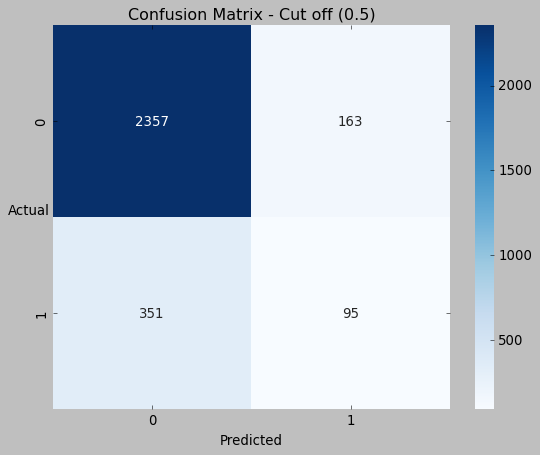

In [66]:
sns.heatmap(metrics.confusion_matrix(y_train, y_train_predict), annot= True, fmt= '.5g', cmap= 'Blues')

plt.xlabel("Predicted")
plt.ylabel('Actual', rotation = 0)
plt.title("Confusion Matrix - Cut off (0.5)")

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2520
           1       1.00      1.00      1.00       446

    accuracy                           1.00      2966
   macro avg       1.00      1.00      1.00      2966
weighted avg       1.00      1.00      1.00      2966



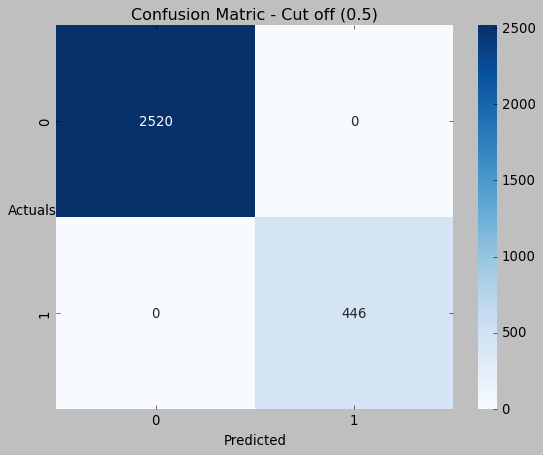

In [69]:
y_train_predict = DT_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(y_train, y_train_predict)), annot=True, fmt='.5g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel('Actuals', rotation = 0)
plt.title('Confusion Matric - Cut off (0.5)')

print(metrics.classification_report(y_train_predict, y_train))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1054
           1       0.29      0.26      0.27       218

    accuracy                           0.76      1272
   macro avg       0.57      0.56      0.57      1272
weighted avg       0.75      0.76      0.76      1272



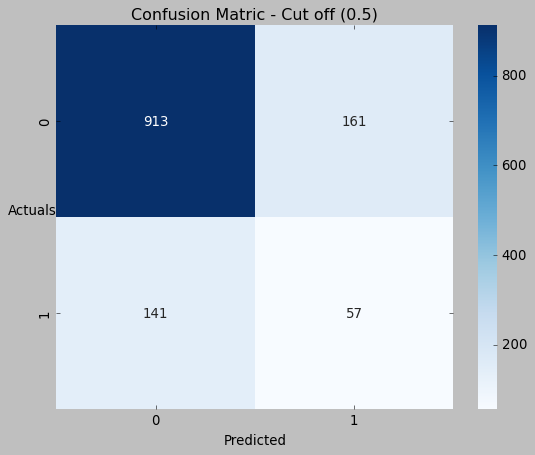

In [70]:
y_test_predict = DT_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict)), annot=True, fmt='.5g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel('Actuals', rotation = 0)
plt.title('Confusion Matric - Cut off (0.5)')

print(metrics.classification_report(y_test_predict, y_test))

In [71]:
DT_model.score(X_test, y_test)

0.7625786163522013

# RandomForest

In [72]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=100, random_state=1)


In [73]:
# Training Performance

RF_model= RF_model.fit(X_train, y_train)

y_train_predict = RF_model.predict(X_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2520
           1       1.00      1.00      1.00       446

    accuracy                           1.00      2966
   macro avg       1.00      1.00      1.00      2966
weighted avg       1.00      1.00      1.00      2966



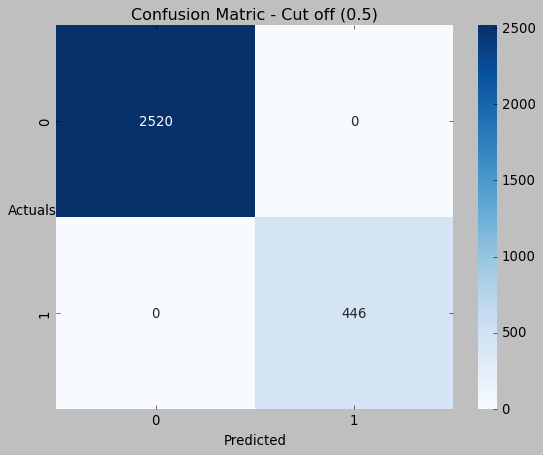

In [74]:
sns.heatmap((metrics.confusion_matrix(y_train, y_train_predict)), annot=True, fmt='.5g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel('Actuals', rotation = 0)
plt.title('Confusion Matric - Cut off (0.5)')

print(metrics.classification_report(y_train_predict, y_train))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1054
           1       0.29      0.26      0.27       218

    accuracy                           0.76      1272
   macro avg       0.57      0.56      0.57      1272
weighted avg       0.75      0.76      0.76      1272



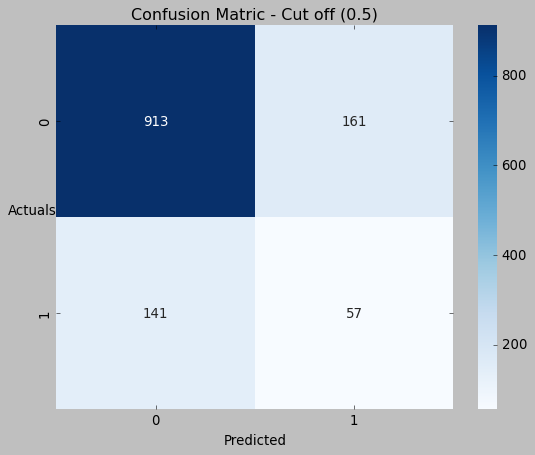

In [75]:
# Testing Performance

y_train_predict = RF_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict)), annot=True, fmt='.5g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel('Actuals', rotation = 0)
plt.title('Confusion Matric - Cut off (0.5)')

print(metrics.classification_report(y_test_predict, y_test))

## Adaboost

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      2893
           1       0.09      0.53      0.15        73

    accuracy                           0.85      2966
   macro avg       0.54      0.70      0.53      2966
weighted avg       0.96      0.85      0.90      2966



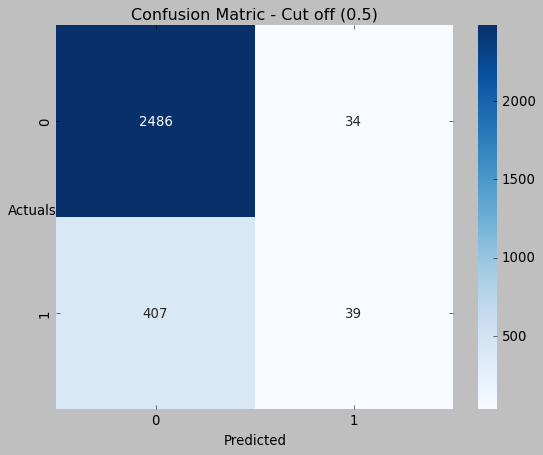

In [76]:
from sklearn.ensemble import AdaBoostClassifier

ABD_model = AdaBoostClassifier(n_estimators=50, random_state=1)
ABD_model = ABD_model.fit(X_train, y_train)

y_train_predict = ABD_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(y_train, y_train_predict)), annot=True, fmt='.5g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel('Actuals', rotation = 0)
plt.title('Confusion Matric - Cut off (0.5)')

print(metrics.classification_report(y_train_predict, y_train))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1054
           1       0.29      0.26      0.27       218

    accuracy                           0.76      1272
   macro avg       0.57      0.56      0.57      1272
weighted avg       0.75      0.76      0.76      1272



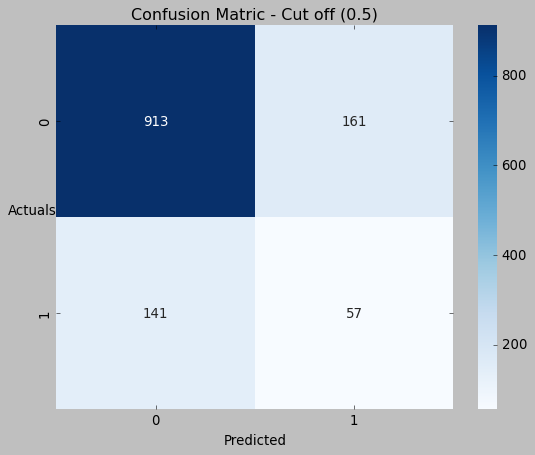

In [77]:
from sklearn.ensemble import AdaBoostClassifier

ABD_model = AdaBoostClassifier(n_estimators=50, random_state=1)
ABD_model = ABD_model.fit(X_train, y_train)

y_train_predict = ABD_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict)), annot=True, fmt='.5g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel('Actuals', rotation = 0)
plt.title('Confusion Matric - Cut off (0.5)')

print(metrics.classification_report(y_test_predict, y_test))

# Gradient Boosting

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model = GradientBoostingClassifier(random_state=1)
GB_model = GB_model.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      2881
           1       0.18      0.96      0.31        85

    accuracy                           0.88      2966
   macro avg       0.59      0.92      0.62      2966
weighted avg       0.98      0.88      0.91      2966



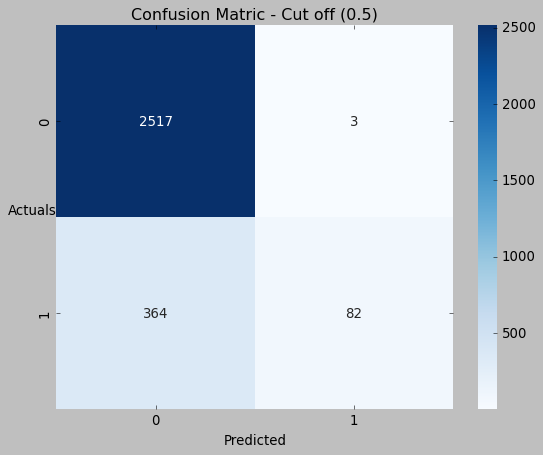

In [79]:
y_train_predict = GB_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(y_train, y_train_predict)), annot=True, fmt='.5g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel('Actuals', rotation = 0)
plt.title('Confusion Matric - Cut off (0.5)')

print(metrics.classification_report(y_train_predict, y_train))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1054
           1       0.29      0.26      0.27       218

    accuracy                           0.76      1272
   macro avg       0.57      0.56      0.57      1272
weighted avg       0.75      0.76      0.76      1272



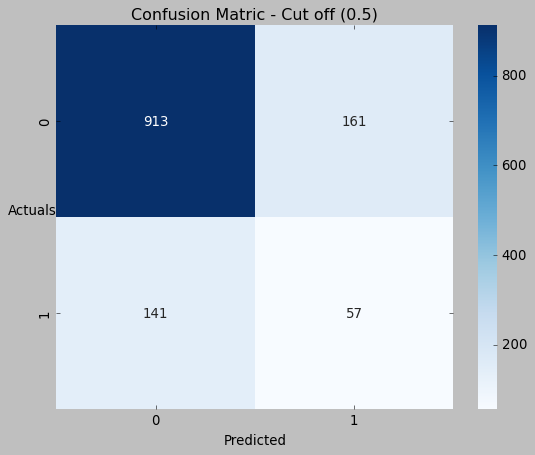

In [80]:
y_train_predict = GB_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict)), annot=True, fmt='.5g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel('Actuals', rotation = 0)
plt.title('Confusion Matric - Cut off (0.5)')

print(metrics.classification_report(y_test_predict, y_test))

# KNN Model

In [81]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()
KNN_model = KNN_model.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2830
           1       0.21      0.70      0.33       136

    accuracy                           0.87      2966
   macro avg       0.60      0.79      0.63      2966
weighted avg       0.95      0.87      0.90      2966



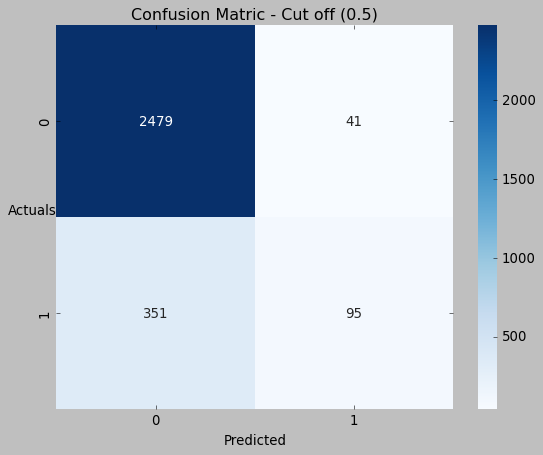

In [82]:
y_train_predict = KNN_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(y_train, y_train_predict)), annot=True, fmt='.5g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel('Actuals', rotation = 0)
plt.title('Confusion Matric - Cut off (0.5)')

print(metrics.classification_report(y_train_predict, y_train))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1054
           1       0.29      0.26      0.27       218

    accuracy                           0.76      1272
   macro avg       0.57      0.56      0.57      1272
weighted avg       0.75      0.76      0.76      1272



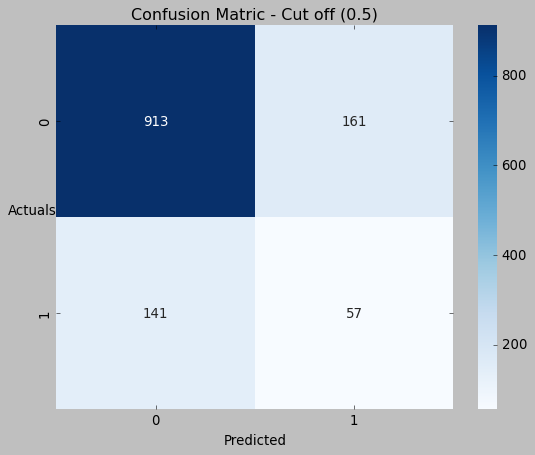

In [83]:
y_train_predict = KNN_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict)), annot=True, fmt='.5g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel('Actuals', rotation = 0)
plt.title('Confusion Matric - Cut off (0.5)')

print(metrics.classification_report(y_test_predict, y_test))

## Gridsearch CV

In [84]:
# Random forest example
from sklearn.model_selection import GridSearchCV

In [85]:
param_grid = {
    "max_depth" : [7,8,9,10],
    "max_features": [11,12,13,14,15],
    "min_samples_leaf": [20,25,35,45],
    "min_samples_split": [101, 301],
    "n_estimators" : [100,200,300,400]
    
}

grid_search = GridSearchCV(estimator= RF_model, param_grid= param_grid, cv= 3)

In [86]:
grid_search

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [7, 8, 9, 10],
                         'max_features': [11, 12, 13, 14, 15],
                         'min_samples_leaf': [20, 25, 35, 45],
                         'min_samples_split': [101, 301],
                         'n_estimators': [100, 200, 300, 400]})

In [87]:
#grid_search.fit(X_train, y_train)

In [88]:
"""y_train_predict = grid_search.predict(X_train)

sns.heatmap((metrics.confusion_matrix(y_train, y_train_predict)), annot=True, fmt='.5g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel('Actuals', rotation = 0)
plt.title('Confusion Matric - Cut off (0.5)')

print(metrics.classification_report(y_train_predict, y_train))"""

'y_train_predict = grid_search.predict(X_train)\n\nsns.heatmap((metrics.confusion_matrix(y_train, y_train_predict)), annot=True, fmt=\'.5g\', cmap=\'Blues\')\nplt.xlabel("Predicted")\nplt.ylabel(\'Actuals\', rotation = 0)\nplt.title(\'Confusion Matric - Cut off (0.5)\')\n\nprint(metrics.classification_report(y_train_predict, y_train))'

In [89]:
#best_grid = grid_search.best_estimator_

# HANDLING Data Imbalance

In [90]:
df_mean['TenYearCHD'].value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

In [91]:
df_mean['TenYearCHD'].value_counts()*100/df_mean.shape[0]

TenYearCHD
0    84.804153
1    15.195847
Name: count, dtype: float64

## SMOTE

In [92]:
from imblearn.over_sampling import SMOTE

In [93]:
import imblearn
print(imblearn._version)

<module 'imblearn._version' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\imblearn\\_version.py'>


In [94]:
SM = SMOTE(random_state=2)
X_train_s, y_train_s = SM.fit_resample(X_train, y_train)

In [95]:
X_train.shape

(2966, 13)

In [96]:
X_train_s.shape

(5040, 13)

In [97]:
KNN_model_s = KNeighborsClassifier()
KNN_model_s = KNN_model.fit(X_train_s, y_train_s)

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1912
           1       1.00      0.80      0.89      3128

    accuracy                           0.88      5040
   macro avg       0.88      0.90      0.87      5040
weighted avg       0.91      0.88      0.88      5040



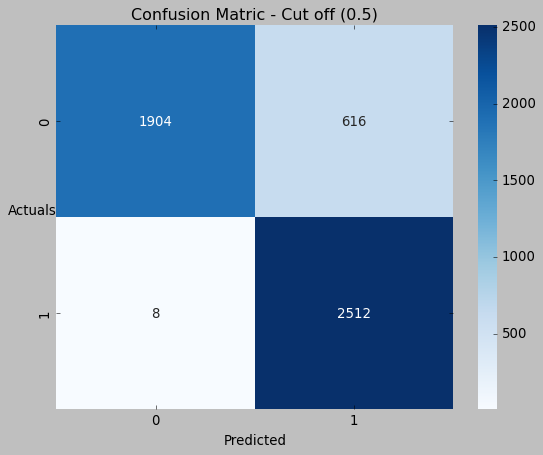

In [98]:
y_train_predict = KNN_model.predict(X_train_s)

sns.heatmap((metrics.confusion_matrix(y_train_s, y_train_predict)), annot=True, fmt='.5g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel('Actuals', rotation = 0)
plt.title('Confusion Matric - Cut off (0.5)')

print(metrics.classification_report(y_train_predict, y_train_s))

              precision    recall  f1-score   support

           0       0.66      0.88      0.75       803
           1       0.51      0.21      0.30       469

    accuracy                           0.63      1272
   macro avg       0.58      0.55      0.53      1272
weighted avg       0.60      0.63      0.58      1272



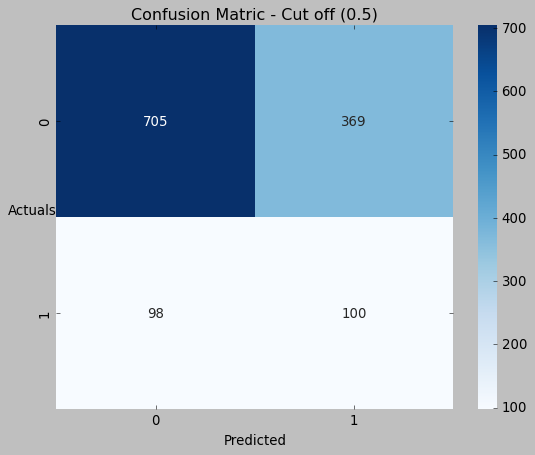

In [99]:
y_test_predict = KNN_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict)), annot=True, fmt='.5g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel('Actuals', rotation = 0)
plt.title('Confusion Matric - Cut off (0.5)')

print(metrics.classification_report(y_test_predict, y_test))

In [100]:
RF_model_s = RandomForestClassifier()
RF_model_s= RF_model.fit(X_train_s, y_train_s)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2520
           1       1.00      1.00      1.00      2520

    accuracy                           1.00      5040
   macro avg       1.00      1.00      1.00      5040
weighted avg       1.00      1.00      1.00      5040



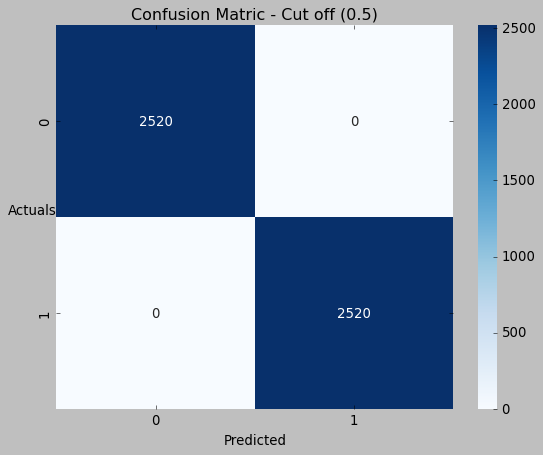

In [101]:
y_train_predict = RF_model.predict(X_train_s)

sns.heatmap((metrics.confusion_matrix(y_train_s, y_train_predict)), annot=True, fmt='.5g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel('Actuals', rotation = 0)
plt.title('Confusion Matric - Cut off (0.5)')

print(metrics.classification_report(y_train_predict, y_train_s))

# MEDIAN

<function matplotlib.pyplot.show(close=None, block=None)>

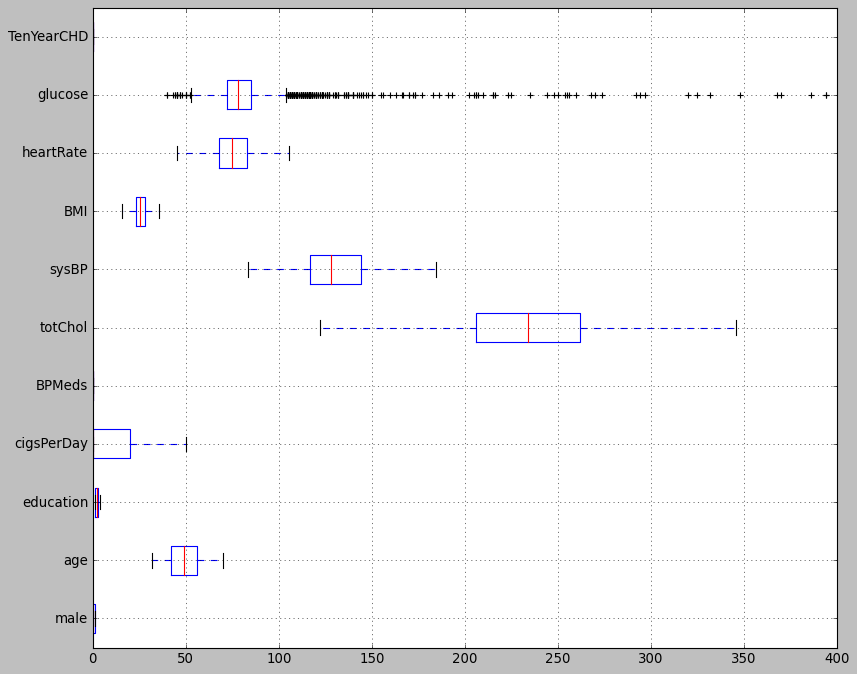

In [102]:
plt.figure(figsize=(12,10))
df_median_out.boxplot(vert = 0)
plt.show

In [103]:
for column in df_median_out.columns:
    if df_median_out[column].dtype == 'object':
        df_median_out[column] = df_median_out[column].astype('float')

In [104]:
df_median_out.dtypes

male               float64
age                float64
education          float64
cigsPerDay         float64
BPMeds             float64
prevalentStroke    float64
prevalentHyp       float64
diabetes           float64
totChol            float64
sysBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD         float64
dtype: object

# Scaling Median Data

In [105]:
df_median_out = pd.DataFrame(scale.fit_transform(df_median_out), columns= df_median_out.columns)

In [106]:
df_median_out

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1.153192,-1.234951,2.008372,-0.756459,0.0,0.0,-0.671101,0.0,-0.973973,-1.255196,0.331170,0.365635,-0.201359,0.0
1,-0.867158,-0.418257,0.044486,-0.756459,0.0,0.0,-0.671101,0.0,0.326499,-0.528621,0.795769,1.656291,-0.245099,0.0
2,1.153192,-0.184916,-0.937456,0.941387,0.0,0.0,-0.671101,0.0,0.208274,-0.213772,-0.099112,-0.064584,-0.507537,0.0
3,-0.867158,1.331800,1.026429,1.790309,0.0,0.0,1.490089,0.0,-0.264625,0.876090,0.756172,-0.925021,0.935872,0.0
4,-0.867158,-0.418257,1.026429,1.196063,0.0,0.0,-0.671101,0.0,1.154071,-0.092676,-0.690419,0.795854,0.148558,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.153192,0.048425,-0.937456,-0.671566,0.0,0.0,1.490089,0.0,1.816130,2.280801,0.067194,-0.838977,0.192298,0.0
4234,1.153192,0.165095,1.026429,2.893908,0.0,0.0,-0.671101,0.0,-0.690233,-0.262210,-1.585299,-0.925021,-0.595016,0.0
4235,-0.867158,-0.184916,0.044486,0.941387,0.0,0.0,-0.671101,0.0,0.279209,-0.044238,-0.980793,0.709810,0.192298,0.0
4236,-0.867158,-0.651598,-0.937456,0.516925,0.0,0.0,-0.671101,0.0,-0.619299,-0.262210,-1.730486,0.881897,-0.157620,0.0


# Model Building on Median Data

In [107]:
X = df_median_out.drop('TenYearCHD', axis=1)

y = df['TenYearCHD']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Naive Bayes

In [109]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train,y_train)

GaussianNB()

In [110]:
y_train_predict = NB_model.predict(X_train)

model_score = NB_model.score(X_train, y_train)

print(model_score)
print()
print(metrics.confusion_matrix(y_train, y_train_predict))
print()
print(metrics.classification_report(y_train, y_train_predict))

0.8213081591368847

[[2341  169]
 [ 361   95]]

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2510
           1       0.36      0.21      0.26       456

    accuracy                           0.82      2966
   macro avg       0.61      0.57      0.58      2966
weighted avg       0.79      0.82      0.80      2966



Text(0.5, 1.0, 'Confusion Matrix - Cut off (0.5)')

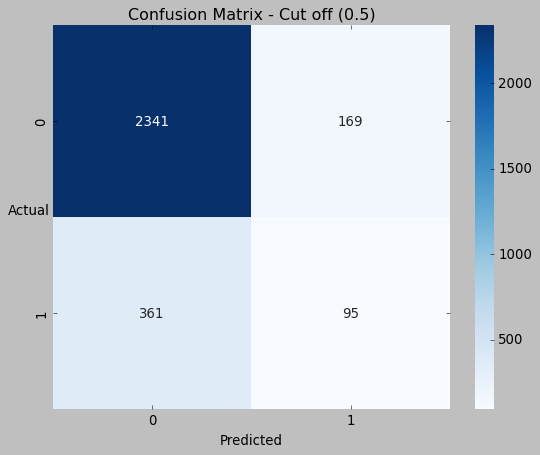

In [111]:
sns.heatmap(metrics.confusion_matrix(y_train, y_train_predict), annot= True, fmt= '.5g', cmap= 'Blues')

plt.xlabel("Predicted")
plt.ylabel('Actual', rotation = 0)
plt.title("Confusion Matrix - Cut off (0.5)")

### Decission Tree

In [112]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2510
           1       1.00      1.00      1.00       456

    accuracy                           1.00      2966
   macro avg       1.00      1.00      1.00      2966
weighted avg       1.00      1.00      1.00      2966



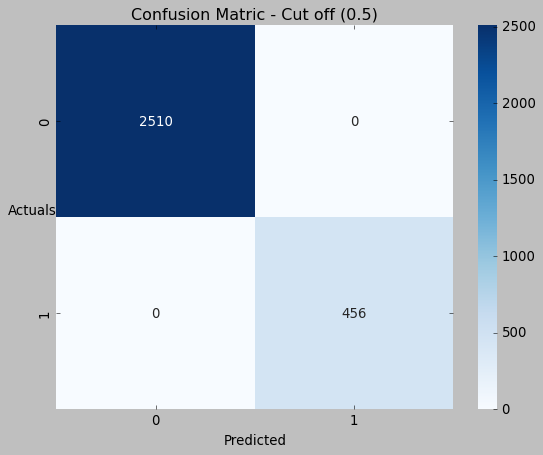

In [113]:
y_train_predict = DT_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(y_train, y_train_predict)), annot=True, fmt='.5g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel('Actuals', rotation = 0)
plt.title('Confusion Matric - Cut off (0.5)')

print(metrics.classification_report(y_train_predict, y_train))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1048
           1       0.29      0.24      0.26       224

    accuracy                           0.76      1272
   macro avg       0.57      0.56      0.56      1272
weighted avg       0.75      0.76      0.75      1272



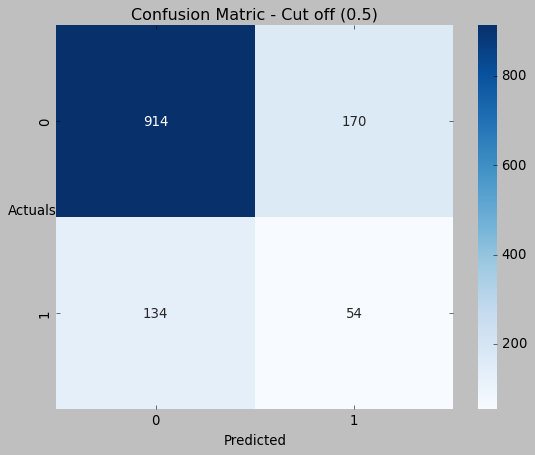

In [114]:
y_test_predict = DT_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict)), annot=True, fmt='.5g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel('Actuals', rotation = 0)
plt.title('Confusion Matric - Cut off (0.5)')

print(metrics.classification_report(y_test_predict, y_test))

In [115]:
DT_model.score(X_test, y_test)

0.7610062893081762

## Random forest

In [116]:
RF_model= RF_model.fit(X_train, y_train)

y_train_predict = RF_model.predict(X_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2510
           1       1.00      1.00      1.00       456

    accuracy                           1.00      2966
   macro avg       1.00      1.00      1.00      2966
weighted avg       1.00      1.00      1.00      2966



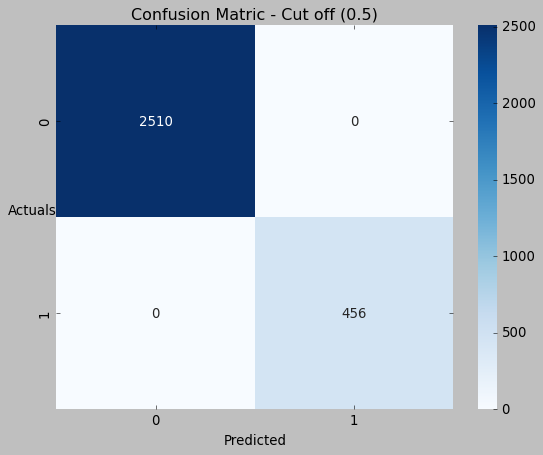

In [117]:
sns.heatmap((metrics.confusion_matrix(y_train, y_train_predict)), annot=True, fmt='.5g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel('Actuals', rotation = 0)
plt.title('Confusion Matric - Cut off (0.5)')

print(metrics.classification_report(y_train_predict, y_train))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1048
           1       0.29      0.24      0.26       224

    accuracy                           0.76      1272
   macro avg       0.57      0.56      0.56      1272
weighted avg       0.75      0.76      0.75      1272



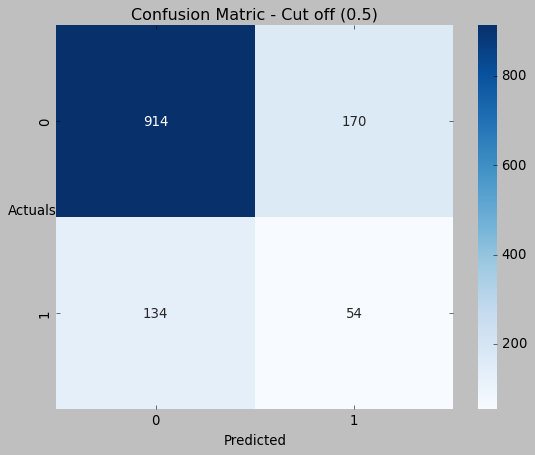

In [118]:
# Testing Performance

y_train_predict = RF_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict)), annot=True, fmt='.5g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel('Actuals', rotation = 0)
plt.title('Confusion Matric - Cut off (0.5)')

print(metrics.classification_report(y_test_predict, y_test))

### ADABOOST

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      2902
           1       0.10      0.70      0.17        64

    accuracy                           0.86      2966
   macro avg       0.55      0.78      0.55      2966
weighted avg       0.97      0.86      0.90      2966



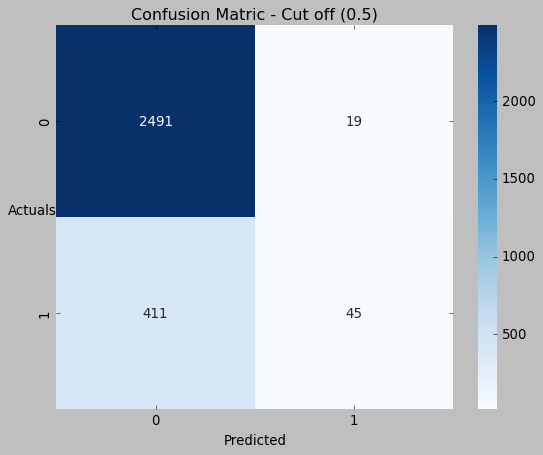

In [119]:
from sklearn.ensemble import AdaBoostClassifier

ABD_model = AdaBoostClassifier(n_estimators=50, random_state=1)
ABD_model = ABD_model.fit(X_train, y_train)

y_train_predict = ABD_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(y_train, y_train_predict)), annot=True, fmt='.5g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel('Actuals', rotation = 0)
plt.title('Confusion Matric - Cut off (0.5)')

print(metrics.classification_report(y_train_predict, y_train))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1048
           1       0.29      0.24      0.26       224

    accuracy                           0.76      1272
   macro avg       0.57      0.56      0.56      1272
weighted avg       0.75      0.76      0.75      1272



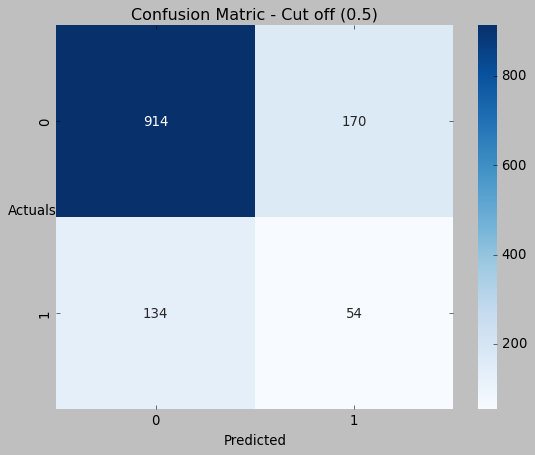

In [120]:
y_train_predict = ABD_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict)), annot=True, fmt='.5g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel('Actuals', rotation = 0)
plt.title('Confusion Matric - Cut off (0.5)')

print(metrics.classification_report(y_test_predict, y_test))

## Gradient Boosting

In [121]:
GB_model = GradientBoostingClassifier(random_state=1)
GB_model = GB_model.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      2868
           1       0.20      0.92      0.32        98

    accuracy                           0.87      2966
   macro avg       0.60      0.90      0.63      2966
weighted avg       0.97      0.87      0.91      2966



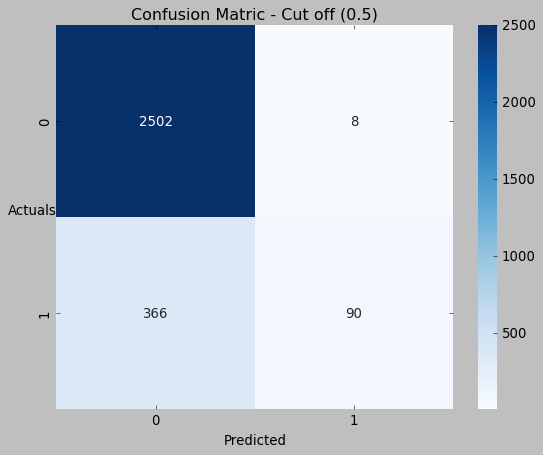

In [122]:
y_train_predict = GB_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(y_train, y_train_predict)), annot=True, fmt='.5g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel('Actuals', rotation = 0)
plt.title('Confusion Matric - Cut off (0.5)')

print(metrics.classification_report(y_train_predict, y_train))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1048
           1       0.29      0.24      0.26       224

    accuracy                           0.76      1272
   macro avg       0.57      0.56      0.56      1272
weighted avg       0.75      0.76      0.75      1272



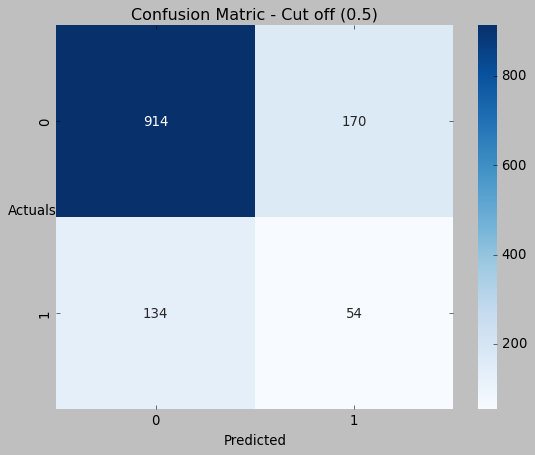

In [123]:
y_train_predict = GB_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict)), annot=True, fmt='.5g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel('Actuals', rotation = 0)
plt.title('Confusion Matric - Cut off (0.5)')

print(metrics.classification_report(y_test_predict, y_test))

### KNN

In [124]:
KNN_model = KNeighborsClassifier()
KNN_model = KNN_model.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2816
           1       0.24      0.72      0.36       150

    accuracy                           0.87      2966
   macro avg       0.61      0.80      0.64      2966
weighted avg       0.95      0.87      0.90      2966



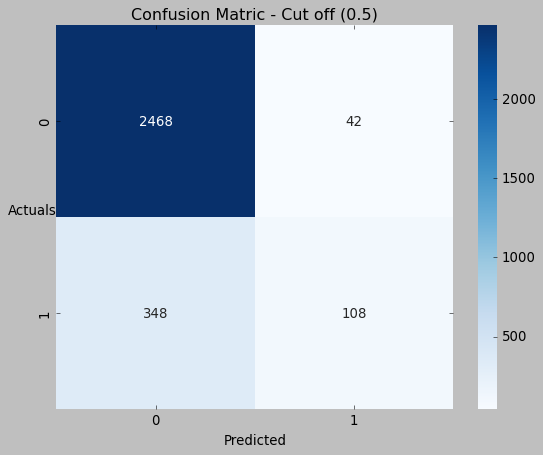

In [125]:
y_train_predict = KNN_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(y_train, y_train_predict)), annot=True, fmt='.5g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel('Actuals', rotation = 0)
plt.title('Confusion Matric - Cut off (0.5)')

print(metrics.classification_report(y_train_predict, y_train))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1048
           1       0.29      0.24      0.26       224

    accuracy                           0.76      1272
   macro avg       0.57      0.56      0.56      1272
weighted avg       0.75      0.76      0.75      1272



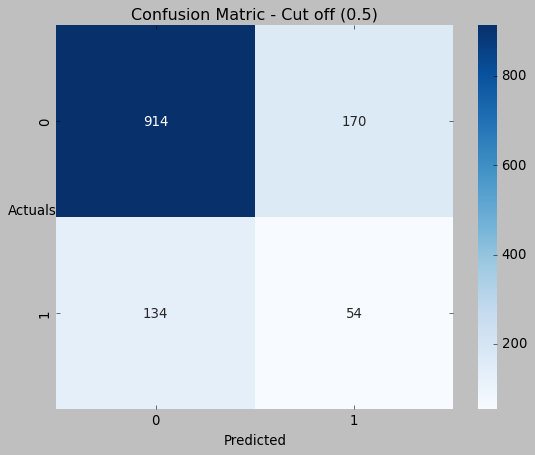

In [126]:
y_train_predict = KNN_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict)), annot=True, fmt='.5g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel('Actuals', rotation = 0)
plt.title('Confusion Matric - Cut off (0.5)')

print(metrics.classification_report(y_test_predict, y_test))

# Handling Data Imbalance


In [127]:
df_median['TenYearCHD'].value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

In [128]:
df_median['TenYearCHD'].value_counts()*100/df_mean.shape[0]

TenYearCHD
0    84.804153
1    15.195847
Name: count, dtype: float64

In [129]:
# SMOTE

In [130]:
SM = SMOTE(random_state=2)
X_train_s, y_train_s = SM.fit_resample(X_train, y_train)

In [131]:
X_train.shape

(2966, 13)

In [132]:
X_train_s.shape

(5020, 13)

In [133]:
KNN_model_s = KNeighborsClassifier()
KNN_model_s = KNN_model.fit(X_train_s, y_train_s)

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1938
           1       0.99      0.81      0.89      3082

    accuracy                           0.88      5020
   macro avg       0.88      0.90      0.88      5020
weighted avg       0.90      0.88      0.88      5020



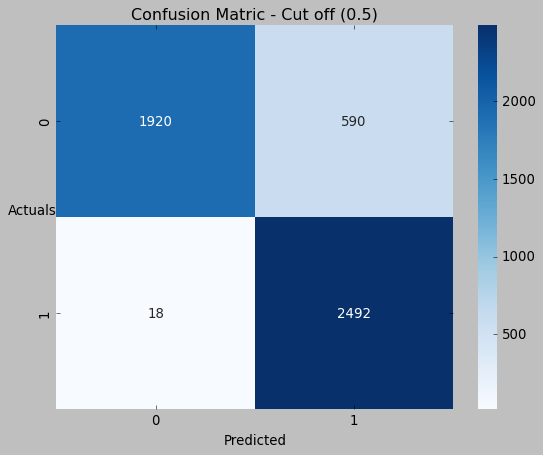

In [134]:
y_train_predict = KNN_model.predict(X_train_s)

sns.heatmap((metrics.confusion_matrix(y_train_s, y_train_predict)), annot=True, fmt='.5g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel('Actuals', rotation = 0)
plt.title('Confusion Matric - Cut off (0.5)')

print(metrics.classification_report(y_train_predict, y_train_s))

              precision    recall  f1-score   support

           0       0.67      0.89      0.76       822
           1       0.50      0.21      0.29       450

    accuracy                           0.65      1272
   macro avg       0.59      0.55      0.53      1272
weighted avg       0.61      0.65      0.60      1272



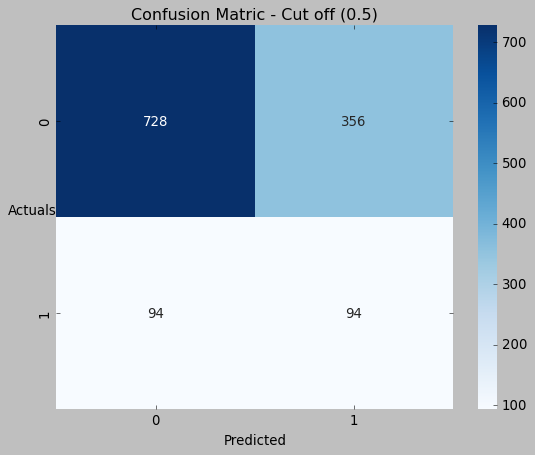

In [135]:
y_test_predict = KNN_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict)), annot=True, fmt='.5g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel('Actuals', rotation = 0)
plt.title('Confusion Matric - Cut off (0.5)')

print(metrics.classification_report(y_test_predict, y_test))

In [136]:
def get_metrics_score(model,flag = True):
    '''
    model: classifier to predict values of X
    
    '''
    # defining an empty list to store train and test results
    score_list = []
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    
    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)
    
    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)
    
    score_list.extend((train_acc, test_acc, train_recall, test_recall, train_precision, test_precision))
    
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train, y_train))
        print("Accuracy on test set : ",model.score(X_test, y_test))
        print("Recall on training set : ",metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test, pred_test))
        print("Precision on Training set : ",model.precision_score(y_train, pred_train))
        print("Precision on Test set : ",model.precision_score(y_test, pred_test))
        
    return score_list

In [137]:
models = [DT_model, ABD_model, GB_model, KNN_model, NB_model, RF_model, KNN_model_s, RF_model_s]

# defining empty list to add train and test results

acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# Looping Through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [139]:
comparison_frame_1 = pd.DataFrame({'Model' : ['DT_model', 'ABD_model', 'GB_model', 'KNN_model', 'NB_model', 'RF_model', 'KNN_model_s', 'RF_model_s'],
                               'Train_Accuracy': acc_train, 'Test_Accuracy': acc_test, 
                               'Train_Recall': recall_train, 'Test_Recall':recall_test, # TP/FN+TP = True Positive
                               'Train_Precision': precision_train, 'Test_Precision': precision_test})
comparison_frame_1

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,DT_model,1.00,0.76,1.00,0.29,1.00,0.24
1,ABD_model,0.86,0.85,0.10,0.10,0.70,0.53
2,GB_model,0.87,0.85,0.20,0.09,0.92,0.55
3,KNN_model,0.80,0.65,0.98,0.50,0.43,0.21
4,NB_model,0.82,0.84,0.21,0.22,0.36,0.41
5,RF_model,1.00,0.86,1.00,0.09,1.00,0.59
6,KNN_model_s,0.80,0.65,0.98,0.50,0.43,0.21
7,RF_model_s,1.00,0.86,1.00,0.09,1.00,0.59


In [140]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [141]:
RF_model.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [142]:
NB_model.fit(X_train,y_train)

GaussianNB()

In [143]:
ABD_model.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [144]:
GB_model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [145]:
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [146]:
models = [DT_model, ABD_model, GB_model, KNN_model, NB_model, RF_model, KNN_model_s, RF_model_s]

# defining empty list to add train and test results

acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# Looping Through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

AUC :  0.709


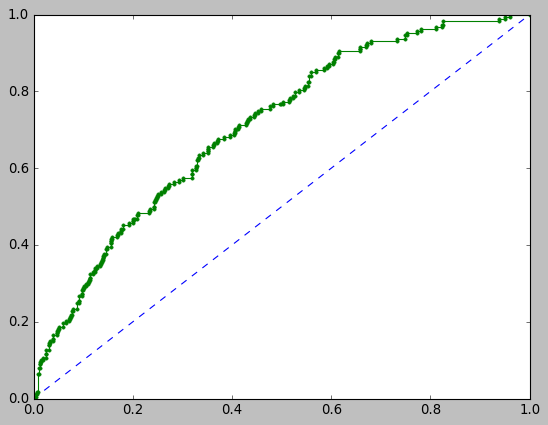

In [147]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
probs2 = GB_model.predict_proba(X_test)

probs2 = probs2[:,1]

auc = roc_auc_score(y_test, probs2)
print("AUC :  %.3f" % auc)

fpr2, tpr2, thresold2 = roc_curve(y_test, probs2)
plt.plot([0,1],[0,1], linestyle = '--')

plt.plot(fpr2, tpr2, marker=".")
plt.show()

In [148]:
df_knn

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.0,1.0
4234,1.0,51.0,3.0,1.0,43.0,0.0,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.0,0.0
4235,0.0,48.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0,0.0
4236,0.0,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,76.8,0.0


In [149]:
df_knn.drop(columns=['diaBP','prevalentHyp','currentSmoker'], inplace=True)

In [150]:
df_knn.isnull().sum()

male               0
age                0
education          0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
diabetes           0
totChol            0
sysBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [151]:
df_knn2 = df_knn[['age','cigsPerDay','BPMeds','totChol','sysBP','heartRate','glucose','TenYearCHD']].apply(lambda x:(x-x.min())/ (x.max()- x.min()))  #Scaling

In [152]:
df_knn2

,age,cigsPerDay,BPMeds,totChol,sysBP,heartRate,glucose,TenYearCHD
0,0.184211,0.000000,0.0,0.149406,0.106383,0.363636,0.104520,0.0
1,0.368421,0.000000,0.0,0.242784,0.177305,0.515152,0.101695,0.0
2,0.421053,0.285714,0.0,0.234295,0.208038,0.313131,0.084746,0.0
3,0.763158,0.428571,0.0,0.200340,0.314421,0.212121,0.177966,1.0
4,0.368421,0.328571,0.0,0.302207,0.219858,0.414141,0.127119,0.0
...,...,...,...,...,...,...,...,...
4233,0.473684,0.014286,0.0,0.349745,0.451537,0.222222,0.129944,1.0
4234,0.500000,0.614286,0.0,0.169779,0.203310,0.212121,0.079096,0.0
4235,0.421053,0.285714,0.0,0.239389,0.224586,0.404040,0.129944,0.0
4236,0.315789,0.214286,0.0,0.174873,0.203310,0.424242,0.103955,0.0


In [153]:
df_knn

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,195.0,106.0,26.97,80.0,77.0,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,250.0,121.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,20.0,0.0,0.0,0.0,245.0,127.5,25.34,75.0,70.0,0.0
3,0.0,61.0,3.0,30.0,0.0,0.0,0.0,225.0,150.0,28.58,65.0,103.0,1.0
4,0.0,46.0,3.0,23.0,0.0,0.0,0.0,285.0,130.0,23.10,85.0,85.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,0.0,0.0,0.0,313.0,179.0,25.97,66.0,86.0,1.0
4234,1.0,51.0,3.0,43.0,0.0,0.0,0.0,207.0,126.5,19.71,65.0,68.0,0.0
4235,0.0,48.0,2.0,20.0,0.0,0.0,0.0,248.0,131.0,22.00,84.0,86.0,0.0
4236,0.0,44.0,1.0,15.0,0.0,0.0,0.0,210.0,126.5,19.16,86.0,76.8,0.0


In [154]:
for column in df_knn.columns:
    if column not in df_knn2.columns:
        df_knn2[column] = df_knn[column]

In [155]:
df_knn2

,age,cigsPerDay,BPMeds,totChol,sysBP,heartRate,glucose,TenYearCHD,male,education,prevalentStroke,diabetes,BMI
0,0.184211,0.000000,0.0,0.149406,0.106383,0.363636,0.104520,0.0,1.0,4.0,0.0,0.0,26.97
1,0.368421,0.000000,0.0,0.242784,0.177305,0.515152,0.101695,0.0,0.0,2.0,0.0,0.0,28.73
2,0.421053,0.285714,0.0,0.234295,0.208038,0.313131,0.084746,0.0,1.0,1.0,0.0,0.0,25.34
3,0.763158,0.428571,0.0,0.200340,0.314421,0.212121,0.177966,1.0,0.0,3.0,0.0,0.0,28.58
4,0.368421,0.328571,0.0,0.302207,0.219858,0.414141,0.127119,0.0,0.0,3.0,0.0,0.0,23.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,0.473684,0.014286,0.0,0.349745,0.451537,0.222222,0.129944,1.0,1.0,1.0,0.0,0.0,25.97
4234,0.500000,0.614286,0.0,0.169779,0.203310,0.212121,0.079096,0.0,1.0,3.0,0.0,0.0,19.71
4235,0.421053,0.285714,0.0,0.239389,0.224586,0.404040,0.129944,0.0,0.0,2.0,0.0,0.0,22.00
4236,0.315789,0.214286,0.0,0.174873,0.203310,0.424242,0.103955,0.0,0.0,1.0,0.0,0.0,19.16


In [156]:
X = df_knn2.drop('TenYearCHD', axis=1)
y = df_knn2['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)

In [157]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [158]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [159]:
ABD_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

In [160]:
GB_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [161]:
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [162]:
NB_model.fit(X_train, y_train)

GaussianNB()

In [163]:
SM = SMOTE(random_state=2)
X_train_s, y_train_s = SM.fit_resample(X_train, y_train)

X_train_s.shape

ABD_model_s = AdaBoostClassifier()
ABD_model_s.fit(X_train_s, y_train_s)

AdaBoostClassifier()

In [164]:
models = [DT_model, ABD_model, GB_model, KNN_model, NB_model, RF_model, KNN_model_s, RF_model_s, ABD_model_s]

# defining empty list to add train and test results

acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# Looping Through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [168]:
comparison_frame_knn = pd.DataFrame({'Model' : ['DT_model_knn', 'ABD_model_knn', 'GB_model_knn', 'KNN_model_knn', 'NB_model_knn', 'RF_model_knn', 'KNN_model_knn', 'RF_model_knn','ABD_model_s'],
                               'Train_Accuracy': acc_train, 'Test_Accuracy': acc_test,
                               'Train_Recall': recall_train, 'Test_Recall':recall_test,
                               'Train_Precision': precision_train, 'Test_Precision': precision_test})
comparison_frame_knn

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,DT_model_knn,1.00,0.74,1.00,0.25,1.00,0.22
1,ABD_model_knn,0.86,0.85,0.11,0.12,0.62,0.59
2,GB_model_knn,0.88,0.84,0.19,0.09,0.97,0.50
3,KNN_model_knn,0.86,0.84,0.15,0.04,0.72,0.30
4,NB_model_knn,0.83,0.83,0.15,0.18,0.36,0.40
5,RF_model_knn,1.00,0.84,1.00,0.04,1.00,0.42
6,KNN_model_knn,0.86,0.84,0.15,0.04,0.72,0.30
7,RF_model_knn,1.00,0.84,1.00,0.04,1.00,0.42
8,ABD_model_s,0.71,0.69,0.52,0.48,0.27,0.25


## df_KNN Outlier

In [170]:
df_knn_o = df_knn.copy()

In [171]:
df_knn_o.isnull().sum()

male               0
age                0
education          0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
diabetes           0
totChol            0
sysBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [172]:
df_imputed = imputer.fit_transform(df_knn_o)
df_knn_o = pd.DataFrame(data= df_imputed, columns=df_knn_o.columns)

In [173]:
df_knn_o.isnull().sum()

male               0
age                0
education          0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
diabetes           0
totChol            0
sysBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [174]:
for column in df_knn_o.drop(['glucose','TenYearCHD'], axis=1).columns:
    lr, ur = remove_outlier(df_knn_o[column])
    
    df_knn_o[column]= np.where(df_knn_o[column]>ur, ur, df_knn_o[column])
    
    df_knn_o[column] = np.where(df_knn_o[column]<lr, lr, df_knn_o[column])

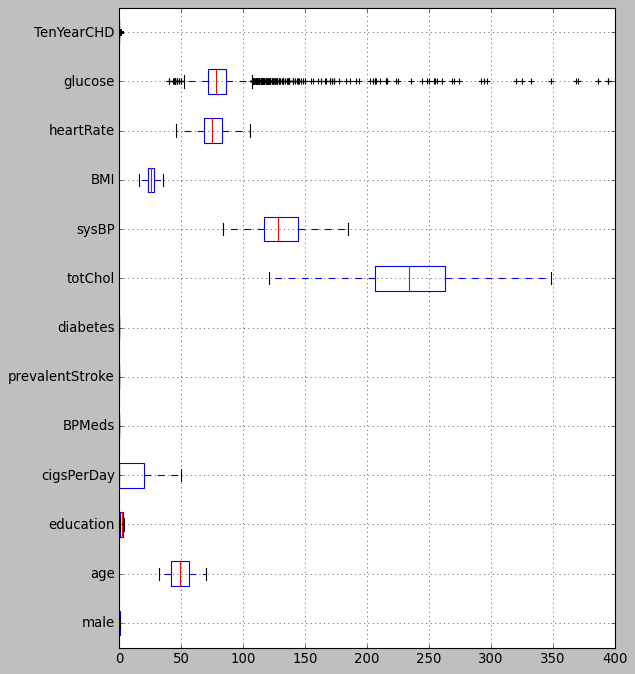

In [175]:
plt.figure(figsize=(8,10))
df_knn_o.boxplot(vert = 0)
plt.show()

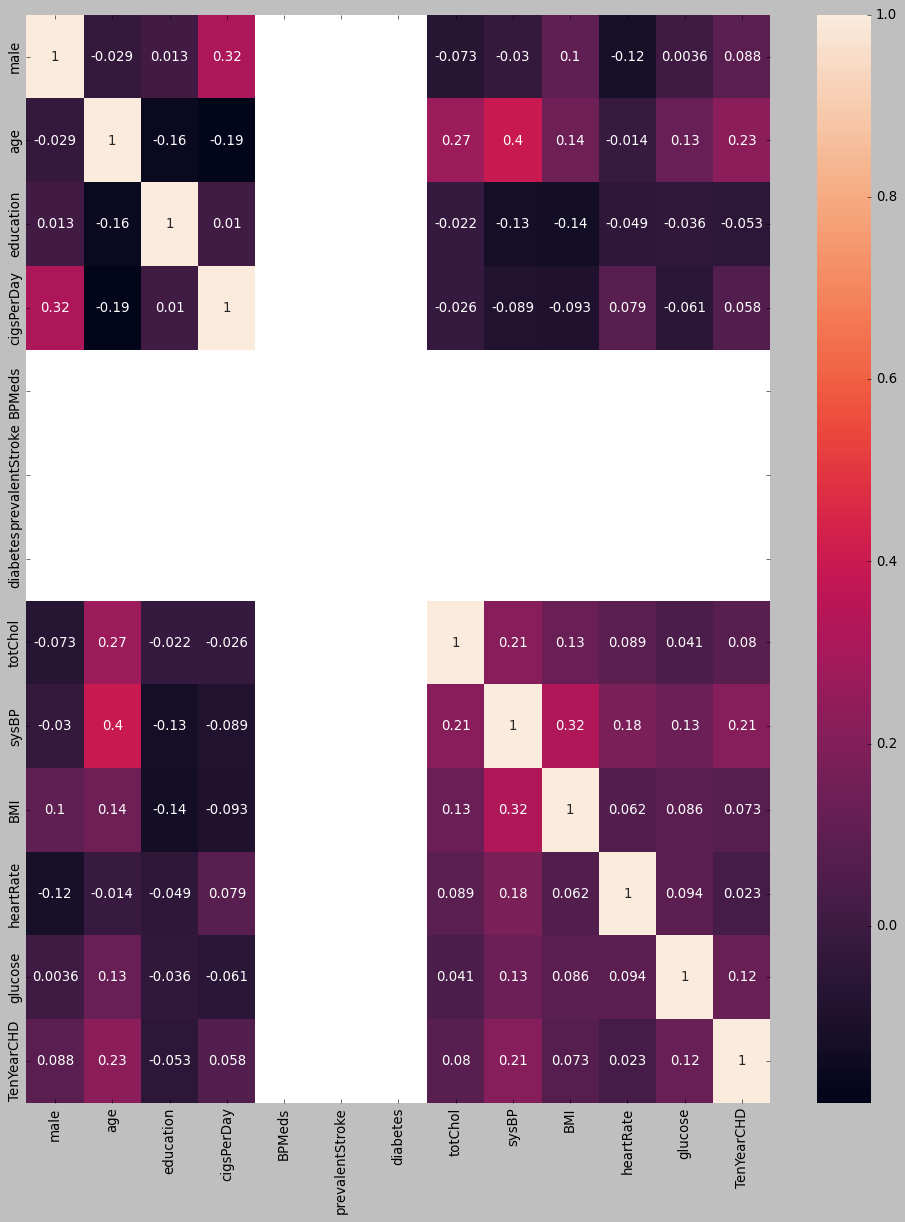

In [176]:
plt.figure(figsize=(15,17))
sns.heatmap(df_knn_o.corr(), annot=True)
plt.show()

In [177]:
df_knn_o.isnull().sum()

male               0
age                0
education          0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
diabetes           0
totChol            0
sysBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [178]:
df_knn_o.drop(columns=['diaBP','prevalentHyp','currentSmoker'], inplace=True)

KeyError: "['diaBP', 'prevalentHyp', 'currentSmoker'] not found in axis"

In [179]:
X = df_knn_o.drop('TenYearCHD', axis=1)
y = df_knn_o.TenYearCHD

In [180]:
X

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,sysBP,BMI,heartRate,glucose
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,195.0,106.0,26.97,80.0,77.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,250.0,121.0,28.73,95.0,76.0
2,1.0,48.0,1.0,20.0,0.0,0.0,0.0,245.0,127.5,25.34,75.0,70.0
3,0.0,61.0,3.0,30.0,0.0,0.0,0.0,225.0,150.0,28.58,65.0,103.0
4,0.0,46.0,3.0,23.0,0.0,0.0,0.0,285.0,130.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,0.0,0.0,0.0,313.0,179.0,25.97,66.0,86.0
4234,1.0,51.0,3.0,43.0,0.0,0.0,0.0,207.0,126.5,19.71,65.0,68.0
4235,0.0,48.0,2.0,20.0,0.0,0.0,0.0,248.0,131.0,22.00,84.0,86.0
4236,0.0,44.0,1.0,15.0,0.0,0.0,0.0,210.0,126.5,19.16,86.0,76.8


In [181]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [182]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [183]:
ABD_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

In [184]:
NB_model.fit(X_train, y_train)

GaussianNB()

In [185]:
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [186]:
GB_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [187]:
sm = SMOTE(random_state=2)
X_train_s, y_train_s = SM.fit_resample(X_train,y_train)

In [188]:
ABD_model_s = AdaBoostClassifier()


In [189]:
GB_model_s = GradientBoostingClassifier()
GB_model_s.fit(X_train_s, y_train_s)

GradientBoostingClassifier()

In [190]:
ABD_model_s.fit(X_train_s, y_train_s)

AdaBoostClassifier()

In [191]:
models = [DT_model, ABD_model, GB_model, KNN_model, NB_model, RF_model, ABD_model_s, GB_model_s]

# defining empty list to add train and test results

acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# Looping Through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [193]:
comparison_frame_knn_o = pd.DataFrame({'Model' : ['DT_model_knn_o', 'ABD_model_knn_o', 'GB_model_knn_o', 
                                            'KNN_model_knn_o', 'NB_model_knn_o', 'RF_model_knn_o',
                                            'ABD_Model_s_knn_o','GB_model_s_knno'],
                               'Train_Accuracy': acc_train, 'Test_Accuracy': acc_test,
                               'Train_Recall': recall_train, 'Test_Recall':recall_test,
                               'Train_Precision': precision_train, 'Test_Precision': precision_test})
comparison_frame_knn_o

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,DT_model_knn_o,1.00,0.75,1.00,0.24,1.00,0.22
1,ABD_model_knn_o,0.86,0.85,0.11,0.12,0.62,0.59
2,GB_model_knn_o,0.88,0.84,0.19,0.09,0.97,0.50
3,KNN_model_knn_o,0.86,0.84,0.15,0.04,0.72,0.30
4,NB_model_knn_o,0.83,0.83,0.15,0.18,0.36,0.40
5,RF_model_knn_o,1.00,0.84,1.00,0.04,1.00,0.42
6,ABD_Model_s_knn_o,0.71,0.69,0.52,0.48,0.27,0.25
7,GB_model_s_knno,0.79,0.75,0.47,0.36,0.35,0.27


In [194]:
df_knn_o

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,195.0,106.0,26.97,80.0,77.0,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,250.0,121.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,20.0,0.0,0.0,0.0,245.0,127.5,25.34,75.0,70.0,0.0
3,0.0,61.0,3.0,30.0,0.0,0.0,0.0,225.0,150.0,28.58,65.0,103.0,1.0
4,0.0,46.0,3.0,23.0,0.0,0.0,0.0,285.0,130.0,23.10,85.0,85.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,0.0,0.0,0.0,313.0,179.0,25.97,66.0,86.0,1.0
4234,1.0,51.0,3.0,43.0,0.0,0.0,0.0,207.0,126.5,19.71,65.0,68.0,0.0
4235,0.0,48.0,2.0,20.0,0.0,0.0,0.0,248.0,131.0,22.00,84.0,86.0,0.0
4236,0.0,44.0,1.0,15.0,0.0,0.0,0.0,210.0,126.5,19.16,86.0,76.8,0.0
